#NAME: ANJALI SHARMA
#PRN:21070149002

# PROBLEM STATEMENT: 
#To do data analysis on India Air Quality data and predict tha value of Air Quality Index based on given features of concentration of sulphur dioxide,nitrogen dioxide, respirable suspended particualte matter, suspended particulate matter and classify the Air Quality as good, moderate, poor, unhealthy, healthy.

# Herein the step by step solution for problem statement - 

##  Importing the libraries

In [950]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

stn_code : Station code. A code is given to each station that recorded the data.

sampling_date: The date when the data was recorded.

state: It represents the states whose air quality data is measured.

location: It represents the city whose air quality data is measured.

agency: Name of the agency that measured the data.

type: The type of area where the measurement was made.

so2: The amount of Sulphur Dioxide measured.

no2: The amount of Nitrogen Dioxide measured

rspm: Respirable Suspended Particulate Matter measured.

spm: Suspended Particulate Matter measured.

location_monitoring_station: It indicates the location of the monitoring area.

pm2_5: It represents the value of particulate matter measured.

date: It represents the date of recording (It is a cleaner 
version of ‘sampling_date’ feature)

##  Reading the dataset
Reading the data set from 'data.csv'

In [951]:
data = pd.read_csv("data.csv",encoding='cp1252')

In [952]:
data.head(10)#print first 10 rows

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
5,152,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,NaN,1990-03-01
6,150,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,NaN,1990-04-01
7,151,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,8.7,NaN,NaN,NaN,NaN,1990-04-01
8,152,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,NaN,1990-04-01
9,151,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.0,8.9,NaN,NaN,NaN,NaN,1990-05-01


In [953]:
data.tail(10) #printing last 10 rows

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435732,SAMP,09-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,145.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-09
435733,SAMP,12-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,34.0,61.0,161.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-12
435734,SAMP,15-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-15
435735,SAMP,18-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-18
435736,SAMP,21-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.0,45.0,140.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-21
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [954]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

 OBSERVATIONS: 

we have 435742 entries in our dataset.
We also see that we have only two data types: float and object.

There are very few values present for pm2_5.

In [955]:
data.describe() #statistical summary of the dataset

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


##The dataset consists primarily 5 different types pollutants measured over the years in different states and cities of India.

Where SO2 and NO2 are harmful gaseous emmissions; rspm, spm and pm2_5 come under susended air pollutants.

In [956]:
#removing duplicate rows
data.drop_duplicates(inplace=True)

In [957]:
data.columns #print the columns/features of the data

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

##Understanding the pollutants briefly here.

NO2: Nitrogen Dioxide and is emmitted mostly from combustion from power sources or transport.

SO2: Sulphur Dioxide and is emmitted mostly from coal burning, oil burning, manufacturing of Sulphuric acid.

spm: Suspended particulate matter and are known to be the deadliest form of air pollution. They are microscopic in nature and are found to be suspended in earth's atmosphere.

rspm: Respirable suspended particulate matter. A sub form of spm and are respnsible for respiratory diseases.

pm2_5: Suspended particulate matter with diameters less than 2.5 micrometres. They tend to remain suspended for longer durations and potentially very harmful

### Inspecting The Dataframe

In [958]:
data.shape #dimensions of the data

(435068, 13)

As per the above dimensionality info. the total number of rows is 435742 and columns are 13

##Null values count

In [959]:
data.isna().sum() #print the sum of null values for each columns

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149466
type                             5357
so2                             34632
no2                             16222
rspm                            40035
spm                            236908
location_monitoring_station     27303
pm2_5                          425754
date                                7
dtype: int64

##Handling Missing Values
The column such as SO2, NO2, rspm, spm, pm2_5 are the ones which contribute much to our analysis.
SPM, RSPM, PM2.5 values are the parameters used to measure the quality of air based on the number of particles present in it. Using these values, we are going to identify the air quality over the period of time in different states of India.

In [960]:
# invoking SimpleImputer to fill missing values
from sklearn.impute import SimpleImputer
so2 = SimpleImputer(strategy='mean', missing_values=np.nan)
so2 = so2.fit(data[['so2']])
data['so2'] = so2.transform(data[['so2']])

no2 = SimpleImputer(strategy='mean', missing_values=np.nan)
no2 = no2.fit(data[['no2']])
data['no2'] = so2.transform(data[['no2']])


rspm = SimpleImputer(strategy='mean', missing_values=np.nan)
no2 = no2.fit(data[['rspm']])
data['rspm'] = so2.transform(data[['rspm']])

spm = SimpleImputer(strategy='mean', missing_values=np.nan)
no2 = no2.fit(data[['spm']])
data['spm'] = so2.transform(data[['spm']])

pm2_5 = SimpleImputer(strategy='mean', missing_values=np.nan)
no2 = no2.fit(data[['pm2_5']])
data['pm2_5'] = so2.transform(data[['pm2_5']])


In [961]:
data

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.800000,17.400000,10.830468,10.830468,NaN,10.830468,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.100000,7.000000,10.830468,10.830468,NaN,10.830468,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.200000,28.500000,10.830468,10.830468,NaN,10.830468,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.300000,14.700000,10.830468,10.830468,NaN,10.830468,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.700000,7.500000,10.830468,10.830468,NaN,10.830468,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.000000,50.000000,143.000000,10.830468,"Inside Rampal Industries,ULUBERIA",10.830468,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.000000,46.000000,171.000000,10.830468,"Inside Rampal Industries,ULUBERIA",10.830468,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,10.830468,10.830468,10.830468,10.830468,NaN,10.830468,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,10.830468,10.830468,10.830468,10.830468,NaN,10.830468,NaN


In [962]:
#Fixing the missing values in the column 'type'
data['type'].describe()
#With 10 Unique labels, we will fill the null values by the most common type, which is 'Residential, Rural and Other Areas'.
common_value='Residential,Rural and other Areas'
data['type']=data['type'].fillna(common_value)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435068 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     290991 non-null  object 
 1   sampling_date                435065 non-null  object 
 2   state                        435068 non-null  object 
 3   location                     435065 non-null  object 
 4   agency                       285602 non-null  object 
 5   type                         435068 non-null  object 
 6   so2                          435068 non-null  float64
 7   no2                          435068 non-null  float64
 8   rspm                         435068 non-null  float64
 9   spm                          435068 non-null  float64
 10  location_monitoring_station  407765 non-null  object 
 11  pm2_5                        435068 non-null  float64
 12  date                         435061 non-null  object 
dtyp

In [963]:
print(data.isnull().sum())


stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149466
type                                0
so2                                 0
no2                                 0
rspm                                0
spm                                 0
location_monitoring_station     27303
pm2_5                               0
date                                7
dtype: int64


#DATA CLEANING
##Dropping of less valued columns:
stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the dataset in terms of information. Therefore, we can drop those columns.

The agency’s name has nothing to do with how much polluted the state is. Similarly, stn_code is also unnecessary.

It is given in the data description that date is a cleaner representation of sampling_date attribute and so we will eliminate the redundancy by removing the latter.

location_monitoring_station attribute is again unnecessary as it contains the location of the monitoring station, which we do not need to consider for the analysis.





In [964]:
data.drop(['stn_code','agency','sampling_date','location_monitoring_station'],axis=1,inplace=True)
data = data.dropna(subset=['date']) # dropping rows where no date is available


# cleaning up name changes

data.state = data.state.replace({'Uttaranchal':'Uttarakhand'})
data.state[data.location == "Jamshedpur"] = data.state[data.location == 'Jamshedpur'].replace({"Bihar":"Jharkhand"})




Currently, the type column has several names for the same type and therefore, it is better to clean it up and make it more uniform.

In [965]:
#changing types to uniform format

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
    
}
data.type = data.type.replace(types)

#Visualization for states with highest pollutants

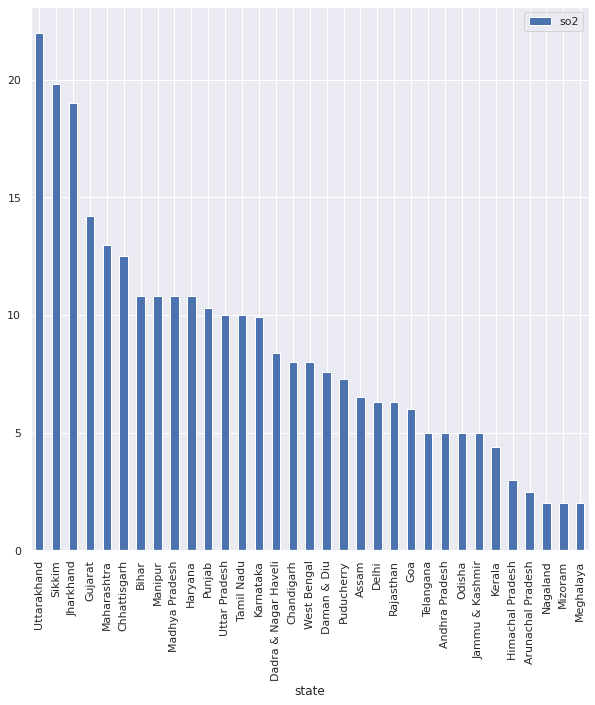

In [966]:

#bar plot of so2 vs state - desc order
data[['so2', 'state']].groupby(['state']).median().sort_values("so2", ascending = False).plot.bar()

so2 level is highest in Uttarakhand and lowest in Meghalaya
So, we can say that in Uttarakhand, Sikkim, Jharkhand, Gujarat, Maharashtra, Chattisgarh — the government should take action against the growing so2 concentration in these states

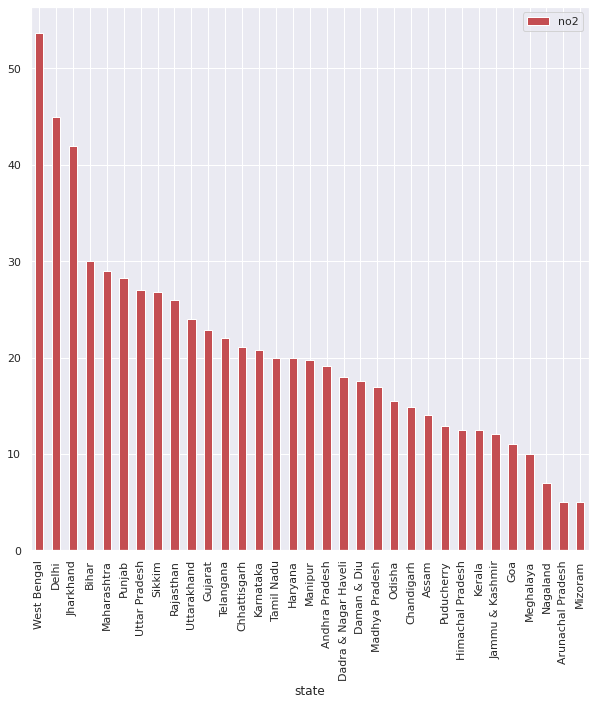

In [967]:

# bar plot of no2 vs state - desc order
data[['no2', 'state']].groupby(['state']).median().sort_values("no2", ascending = False).plot.bar(color = 'r')

West Bengal has the maximum level of no2, whereas Mizoram has the least.
Delhi(the capital) is ‘ranked’ second, followed by Jharkhand.

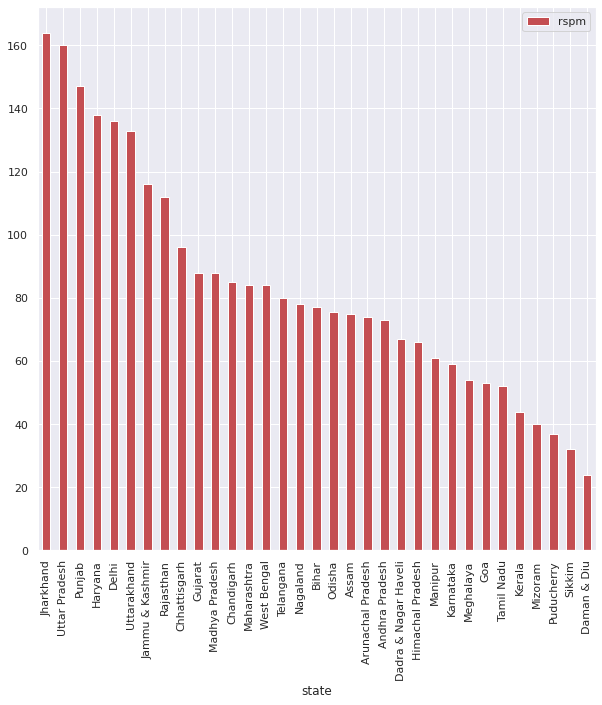

In [968]:

# rspm = PM10
data[['rspm', 'state']].groupby(['state']).median().sort_values("rspm", ascending = False).plot.bar(color = 'r')


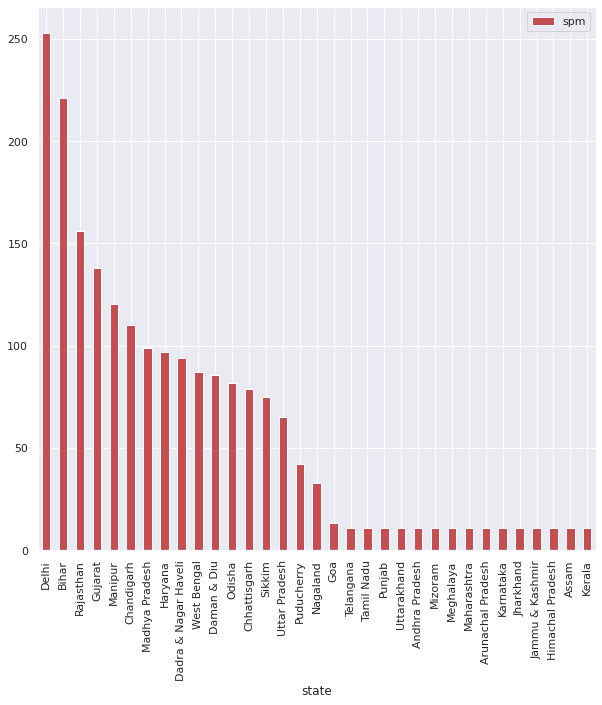

In [969]:
# spm
data[['spm', 'state']].groupby(['state']).median().sort_values("spm", ascending = False).plot.bar(color = 'r')

###MEAN DISTRIBUTION BY STATE

In [970]:
data.groupby('state')[['spm','pm2_5','rspm','so2','no2']].mean()

,spm,pm2_5,rspm,so2,no2
state,,,,,
Andhra Pradesh,96.157953,10.830468,75.318699,7.399760,21.538336
Arunachal Pradesh,10.830468,10.830468,75.898116,5.134453,6.899236
Assam,54.222083,10.830468,92.547313,6.751181,14.775894
Bihar,221.606391,10.830468,82.351729,16.669379,34.755432
Chandigarh,124.248055,10.830468,92.840138,6.601568,17.766427
Chhattisgarh,121.806754,10.830468,110.715799,12.717366,24.215894
Dadra & Nagar Haveli,117.169130,12.167419,56.295326,8.960904,18.253005
Daman & Diu,108.230349,11.795069,46.333584,8.201582,16.206427
Delhi,258.862885,14.488077,155.735208,8.917882,50.776989


#Scatter plots of all columns

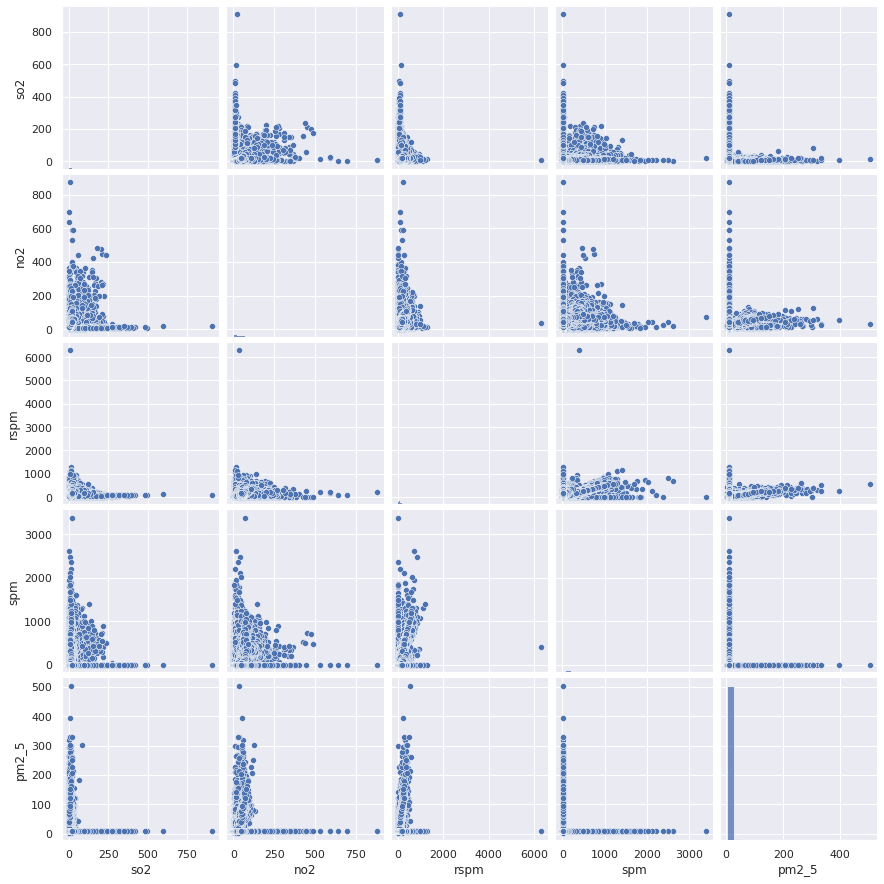

In [971]:
#Scatter plots of all columns
sns.set()
cols = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
sns.pairplot(data[cols], size = 2.5)
plt.show()

OBSERVATIONS:
so2 and no2 values are highly concentrated near to the origin, which means that both are low for most of the observations

 spm and rspm share somewhat linear relationship, rest all features are not entirely related.

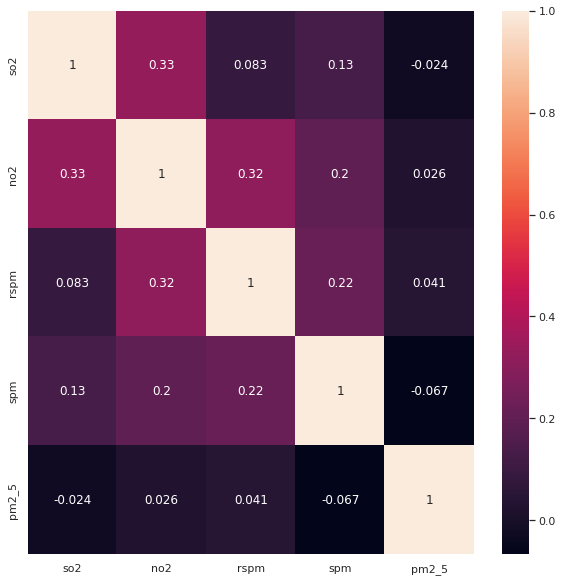

In [972]:

#Correlation matrix
#corrmat = df.corr()
##f, ax = plt.subplots(figsize = (15, 10))
#sns.heatmap(corrmat, vmax = 1, square = True, annot = True)

sns.heatmap(
    data.loc[:, ['state','so2', 'no2', 'rspm', 'spm', 'pm2_5']].corr(),
    annot=True
)

Observations:From the correlations, rspm and NO2 show a high value, followed by that of spm & rspm

Creating a new feature(year) from the date feature.
This is because we are interested in the annual effects of air pollution.

In [973]:
# Creating an year column
data['date'] = pd.to_datetime(data['date'], format = '%Y/%m/%d')
data['year'] = data['date'].dt.year # year
data['year'] = data['year'].fillna(0.0).astype(int)
data = data[(data['year']>0)]
data.head()


,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,10.830468,10.830468,10.830468,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,10.830468,10.830468,10.830468,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,10.830468,10.830468,10.830468,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,10.830468,10.830468,10.830468,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,10.830468,10.830468,10.830468,1990-03-01,1990


#so2 analysis using the heatmap
##row: state attribute
##column: year attribute
##value: no2 attribute

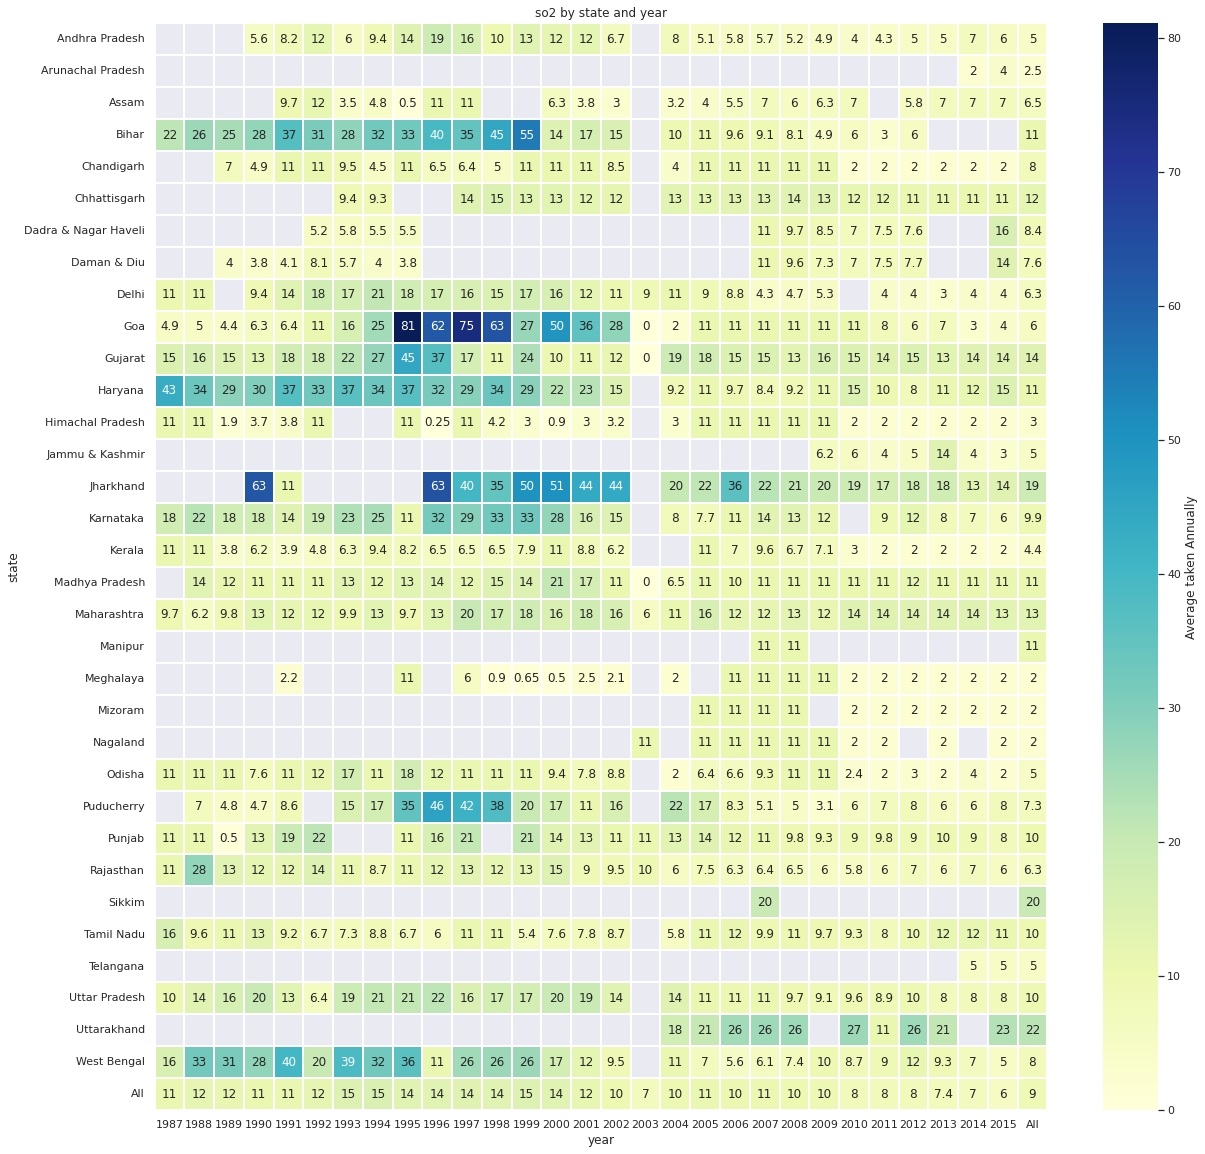

In [974]:
# Heatmap Pivot with State as Row, Year as Col, SO2 as Value
f, ax = plt.subplots(figsize = (20,20))
ax.set_title('{} by state and year'.format('so2'))
sns.heatmap(data.pivot_table('so2', index = 'state',
                columns = ['year'], aggfunc = 'median', margins=True),
                annot = True, cmap = 'YlGnBu', linewidths = 1, ax = ax, cbar_kws = {'label': 'Average taken Annually'})

##OBSERVATIONS: 
## 1. It is evident from the heatmap that there has been a gradual increase of so2 concentration in Bihar from 1987 to 1999.
## 2. Similarly, there has been a high concentration of so2 in Gujarat around 1995
## 3. In Harayana also we can see that so2 level has been high around 1987 and has been consistently high till 2003.
## 4. In Karnataka also there is a gradual increase in so2 concentration from 1987 to 2000
## 5. Puducherry also has witnessed a high value of so2 concentration around 1996.
## 6. Rajasthan also has experienced a high concentration of so2 around 1987.
## 7. Uttarakhand has been experiencing a high level of so2 concentration from 2004 till now.
##8. In West Bengal, the so2 concentration has been consistently high from 1987 to 2000. 

## The above analysis shows that the presence of the pollutant sulphur dioxide has been high from 1980 to 2000 in some states but has decreased in the new century(from 2000)

#No2 analysis using the heatmap 
##row: state attribute
#column: year attribute
#value: no2 attribute

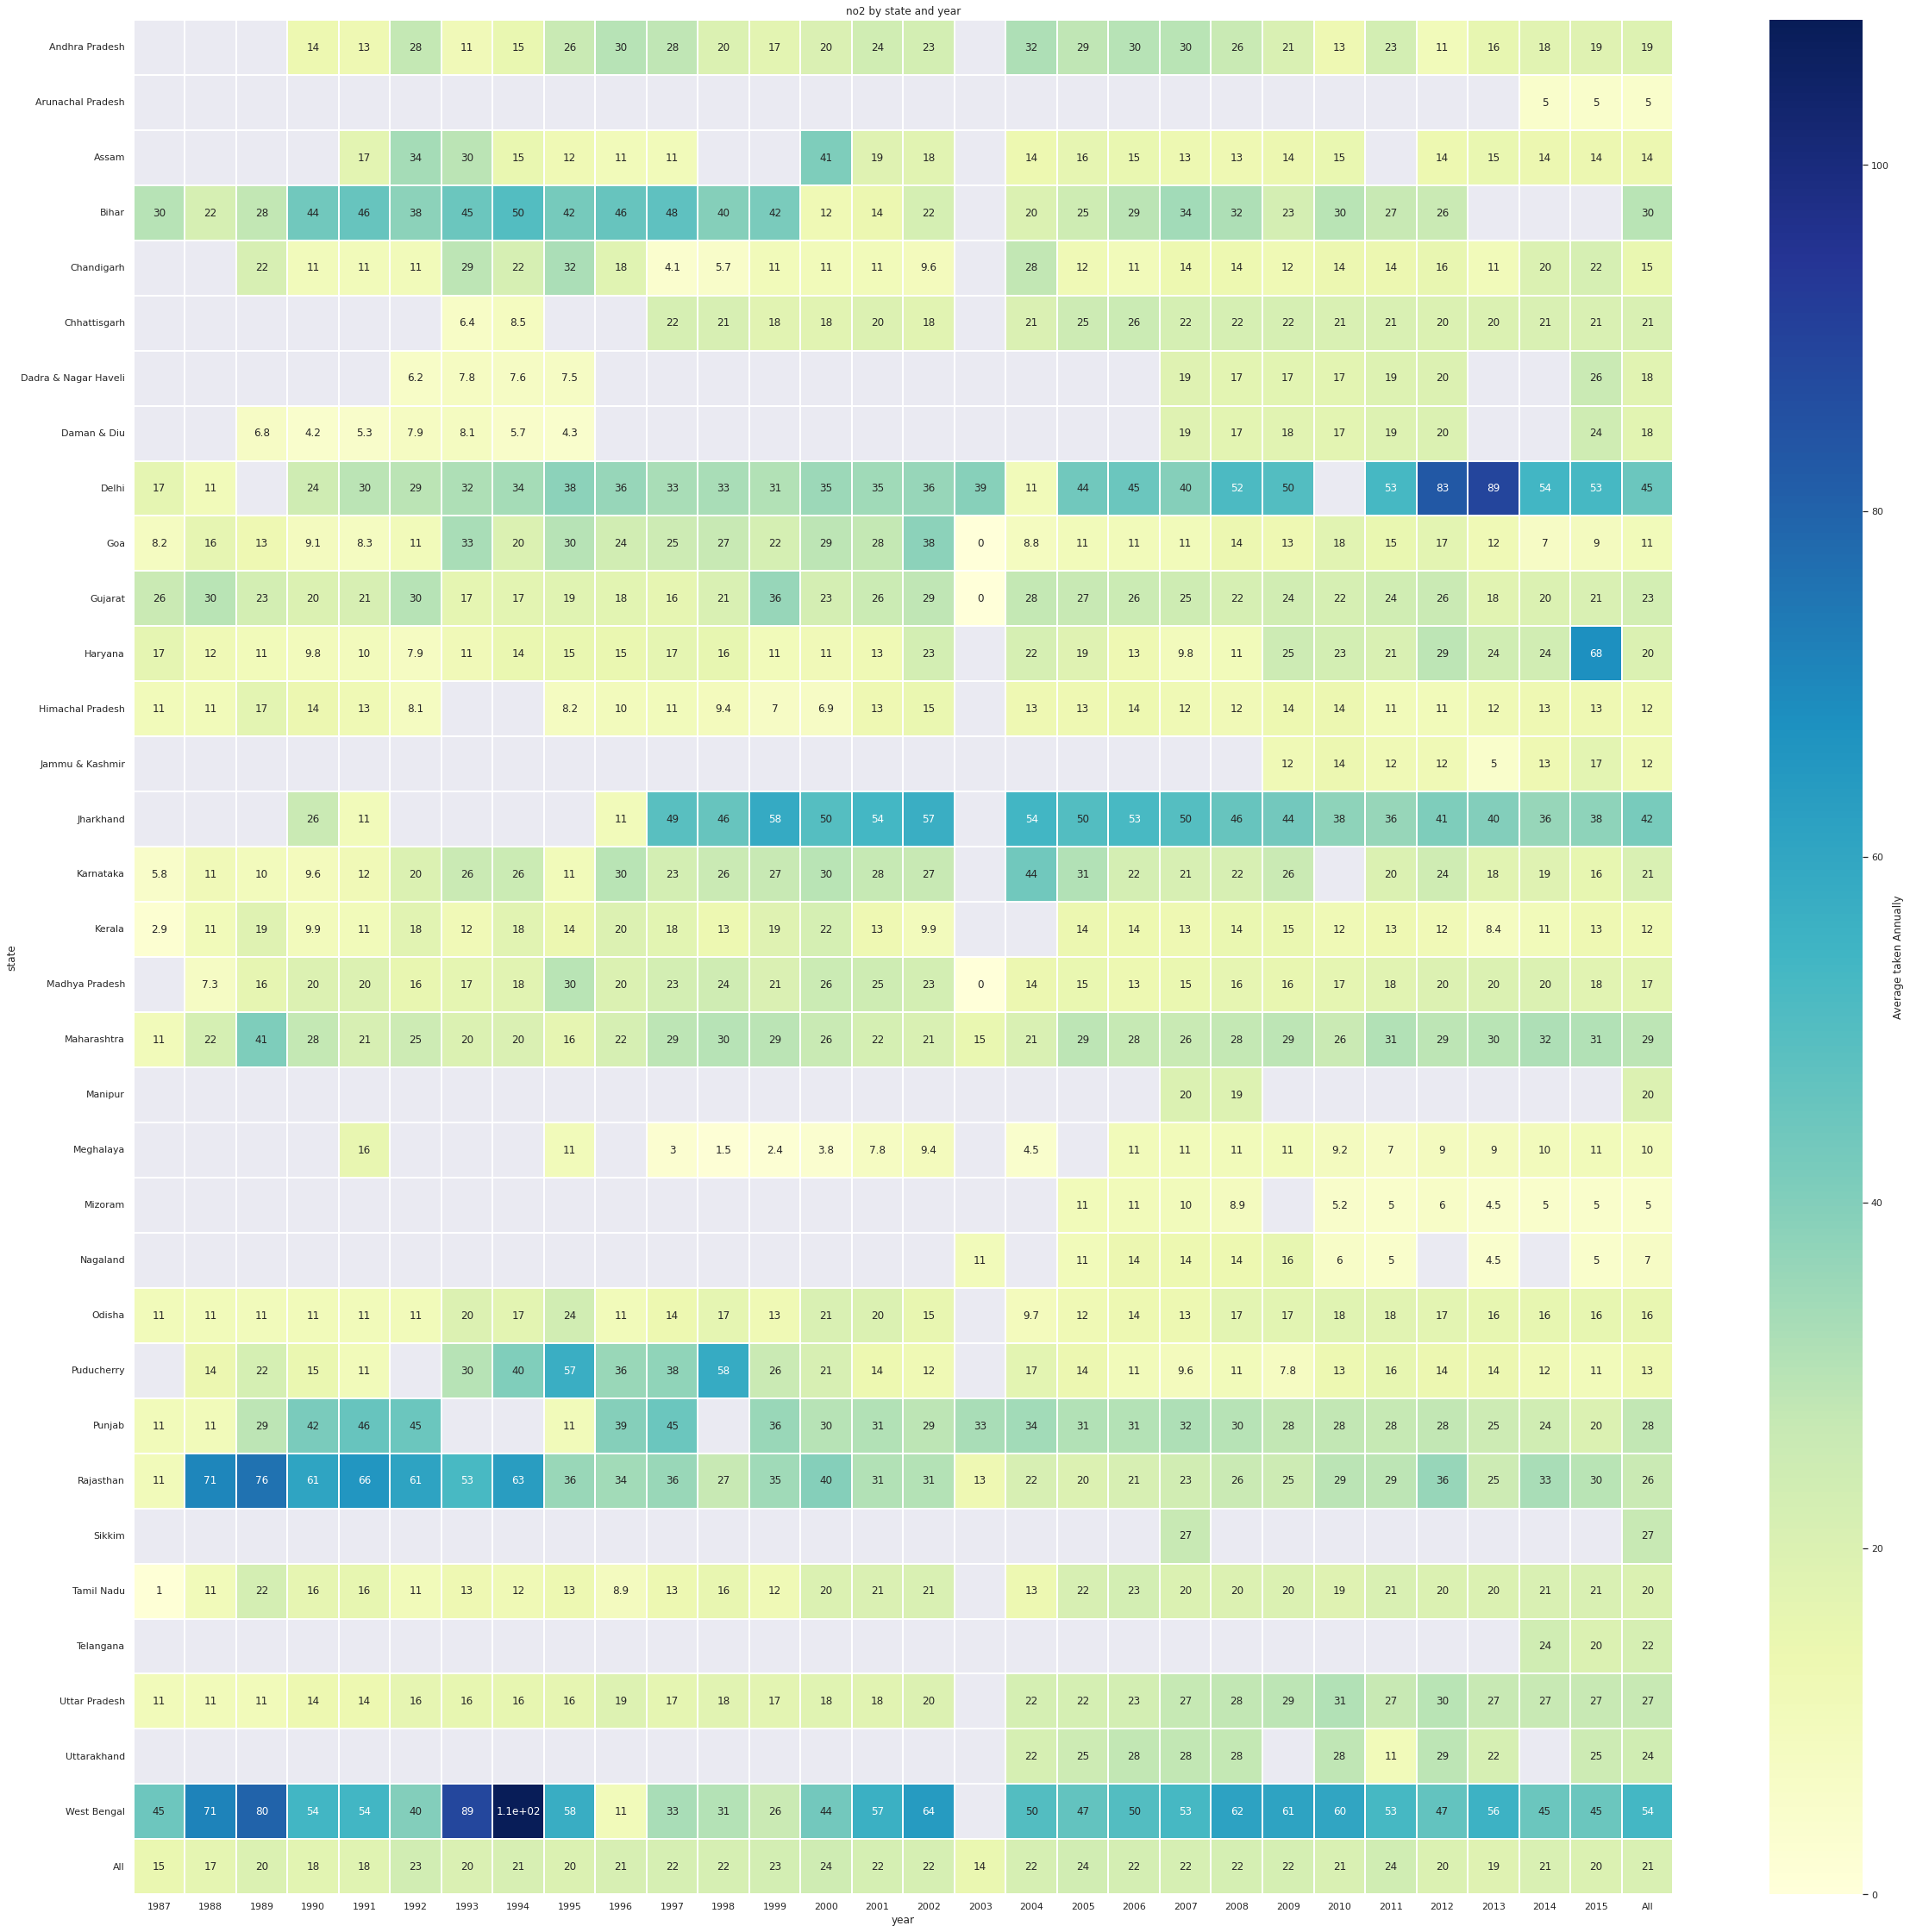

In [975]:
# Heatmap Pivot with State as Row, Year as Col, No2 as Value
f, ax = plt.subplots(figsize = (40,40))
ax.set_title('{} by state and year'.format('no2'))
sns.heatmap(data.pivot_table('no2', index = 'state',
                columns = ['year'], aggfunc = 'median', margins=True),
                annot = True, cmap = 'YlGnBu', linewidths = 1, ax = ax, cbar_kws = {'label': 'Average taken Annually'})

#OBSERVATIONS:
## 1. We can see that states like Rajasthan, Bihar, Delhi, Harayana, Jharkhand, Puducherry, West Bengal have experienced a severe level of no2 concentration
## 2. The no2 concentration has decreased annually in some states like Rajasthan, whereas in states like Bihar, Delhi, etc
## 3. In other states like West Bengal, Jharkhand the no2 concentrations have remained consistently high.
## 4. If we look at the heatmap closely, then we see from 2000 onwards the no2 concentrations have increased(as a whole) throughout the country

#rspm analysis using the heatmap
## row: state attribute
#column: year attribute
#value: rspm attribute


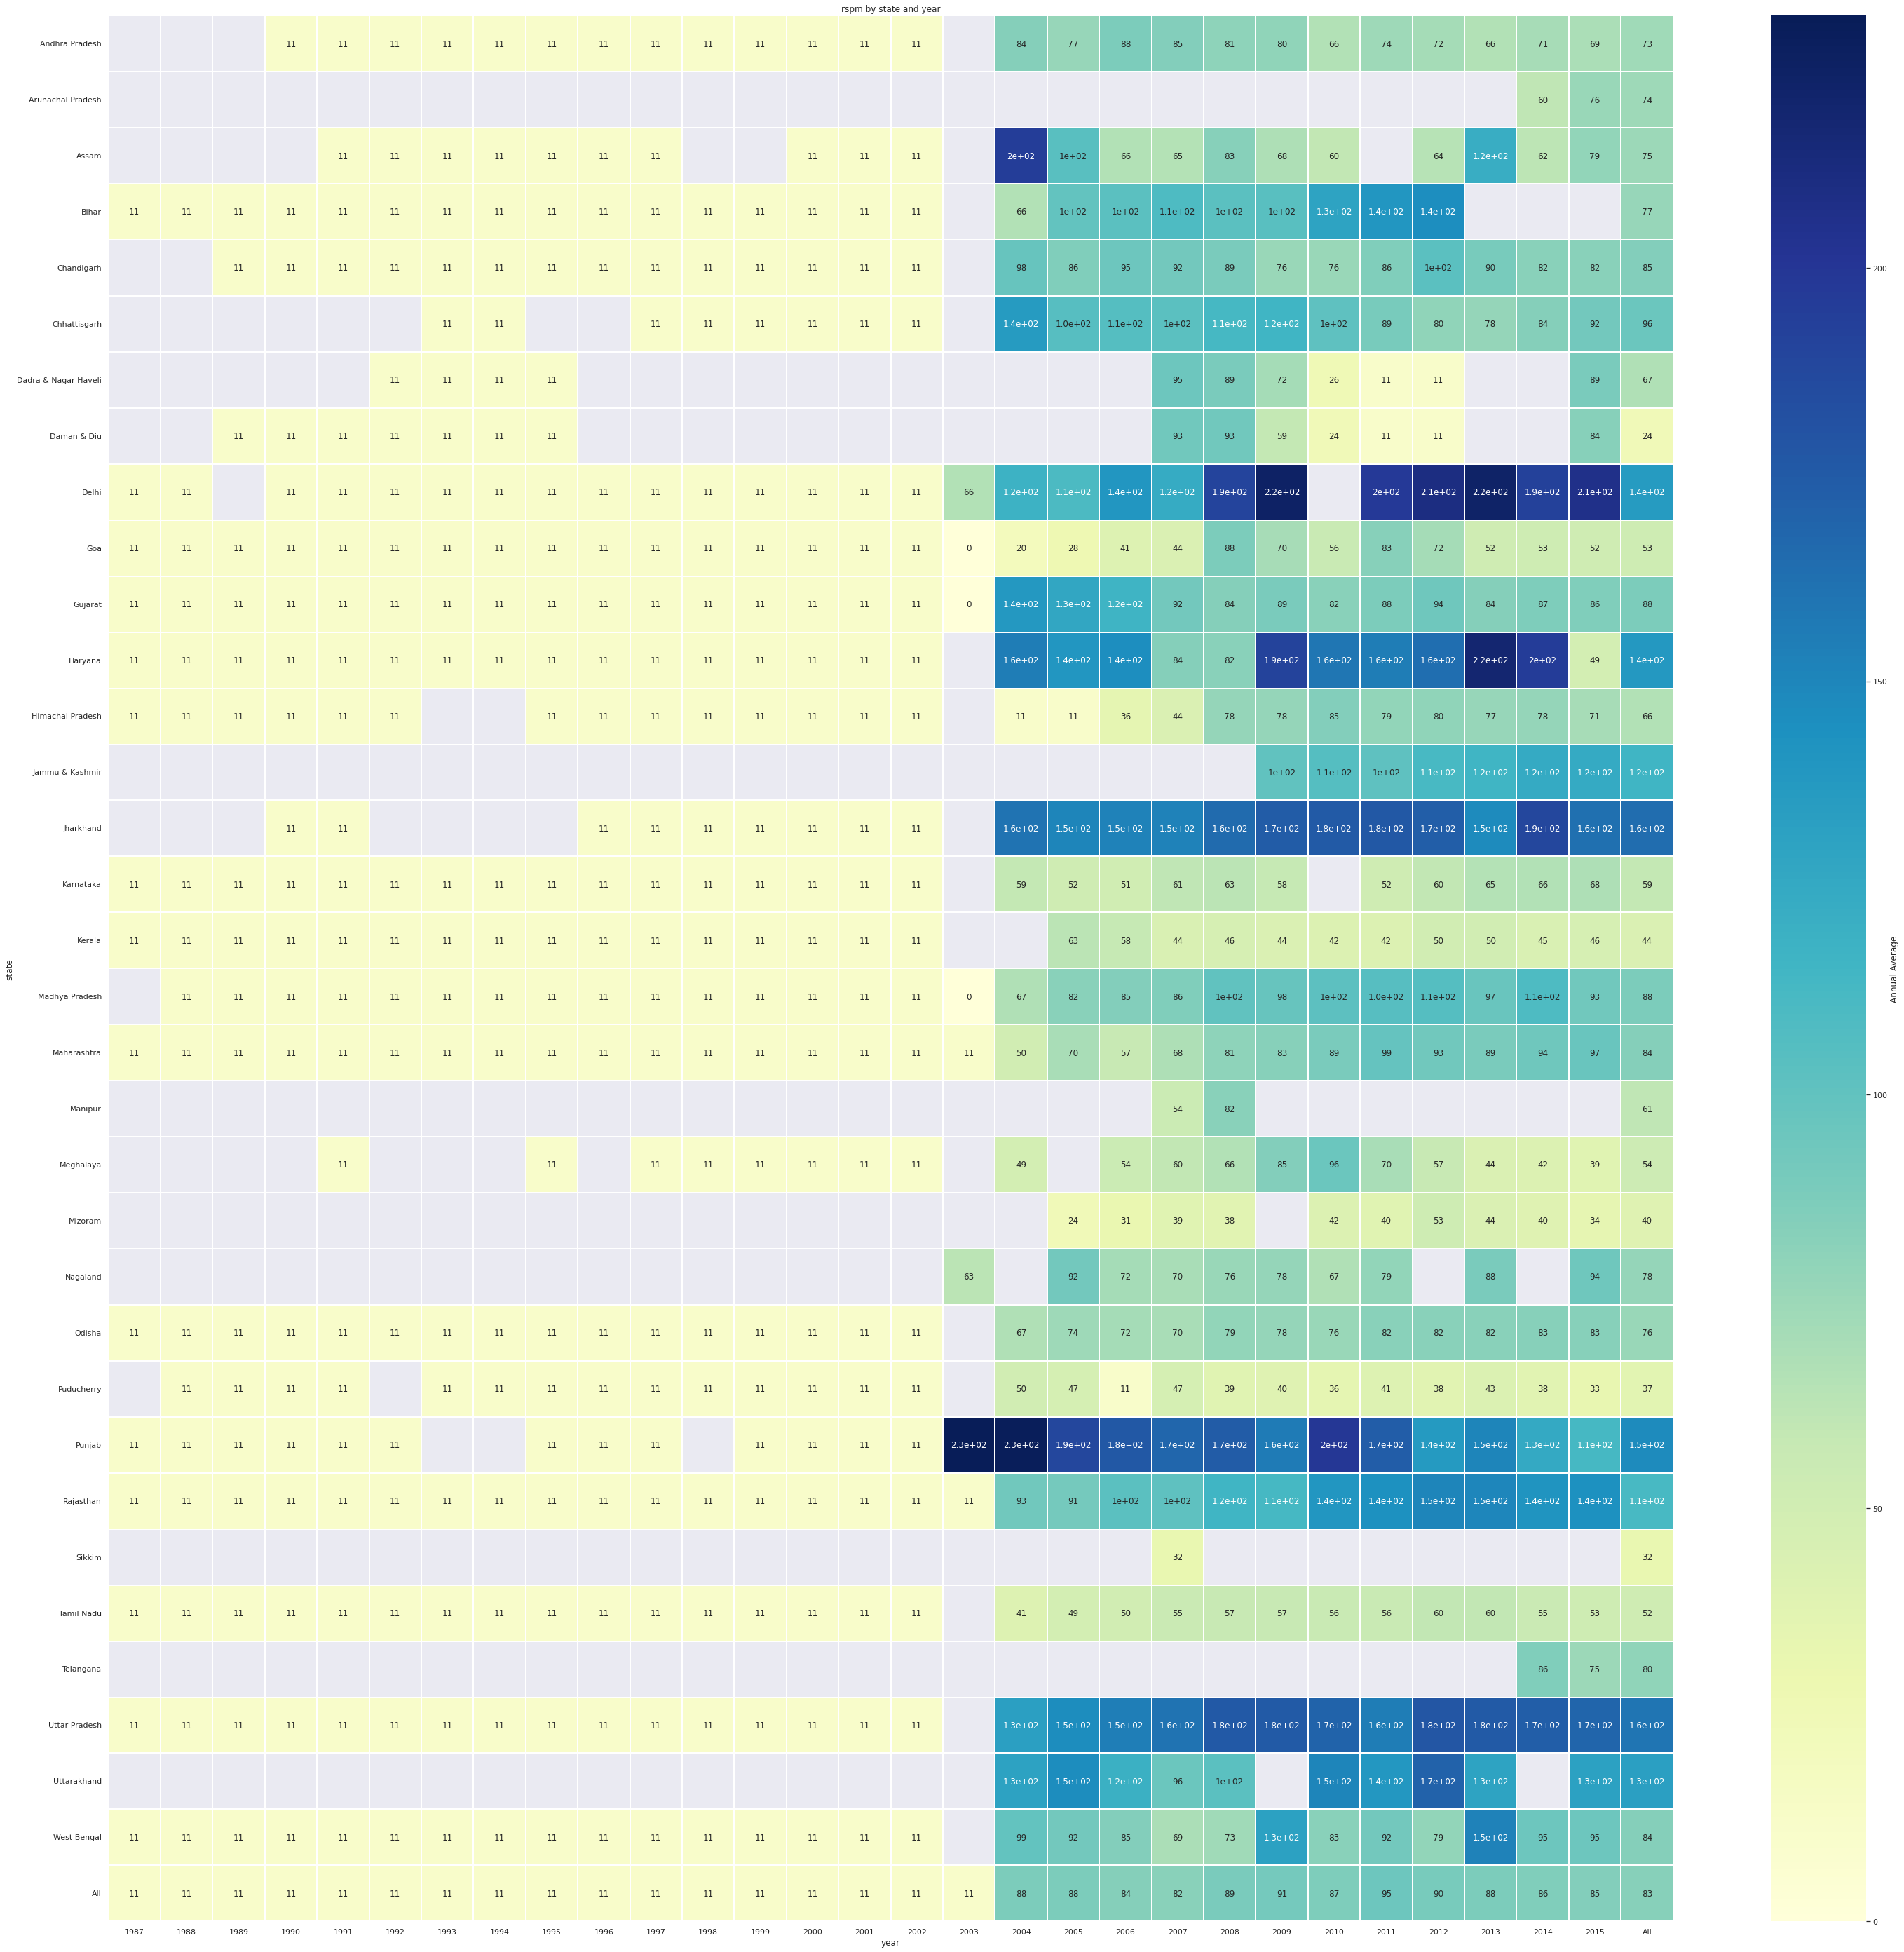

In [976]:
# heatmap of rspm
f, ax = plt.subplots(figsize = (50,50))
ax.set_title('{} by state and year'.format('rspm'))
sns.heatmap(data.pivot_table('rspm', index='state',
                columns = ['year'], aggfunc = 'median', margins = True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax, cbar_kws = {'label': 'Annual Average'})

Here we see that states like Delhi, Punjab, Uttar Pradesh, Harayana, Jharkhand have suffered from high levels of rspm.

#spm analysis using the heatmap
## row: state attribute
##column: year attribute
##value: spm attribute

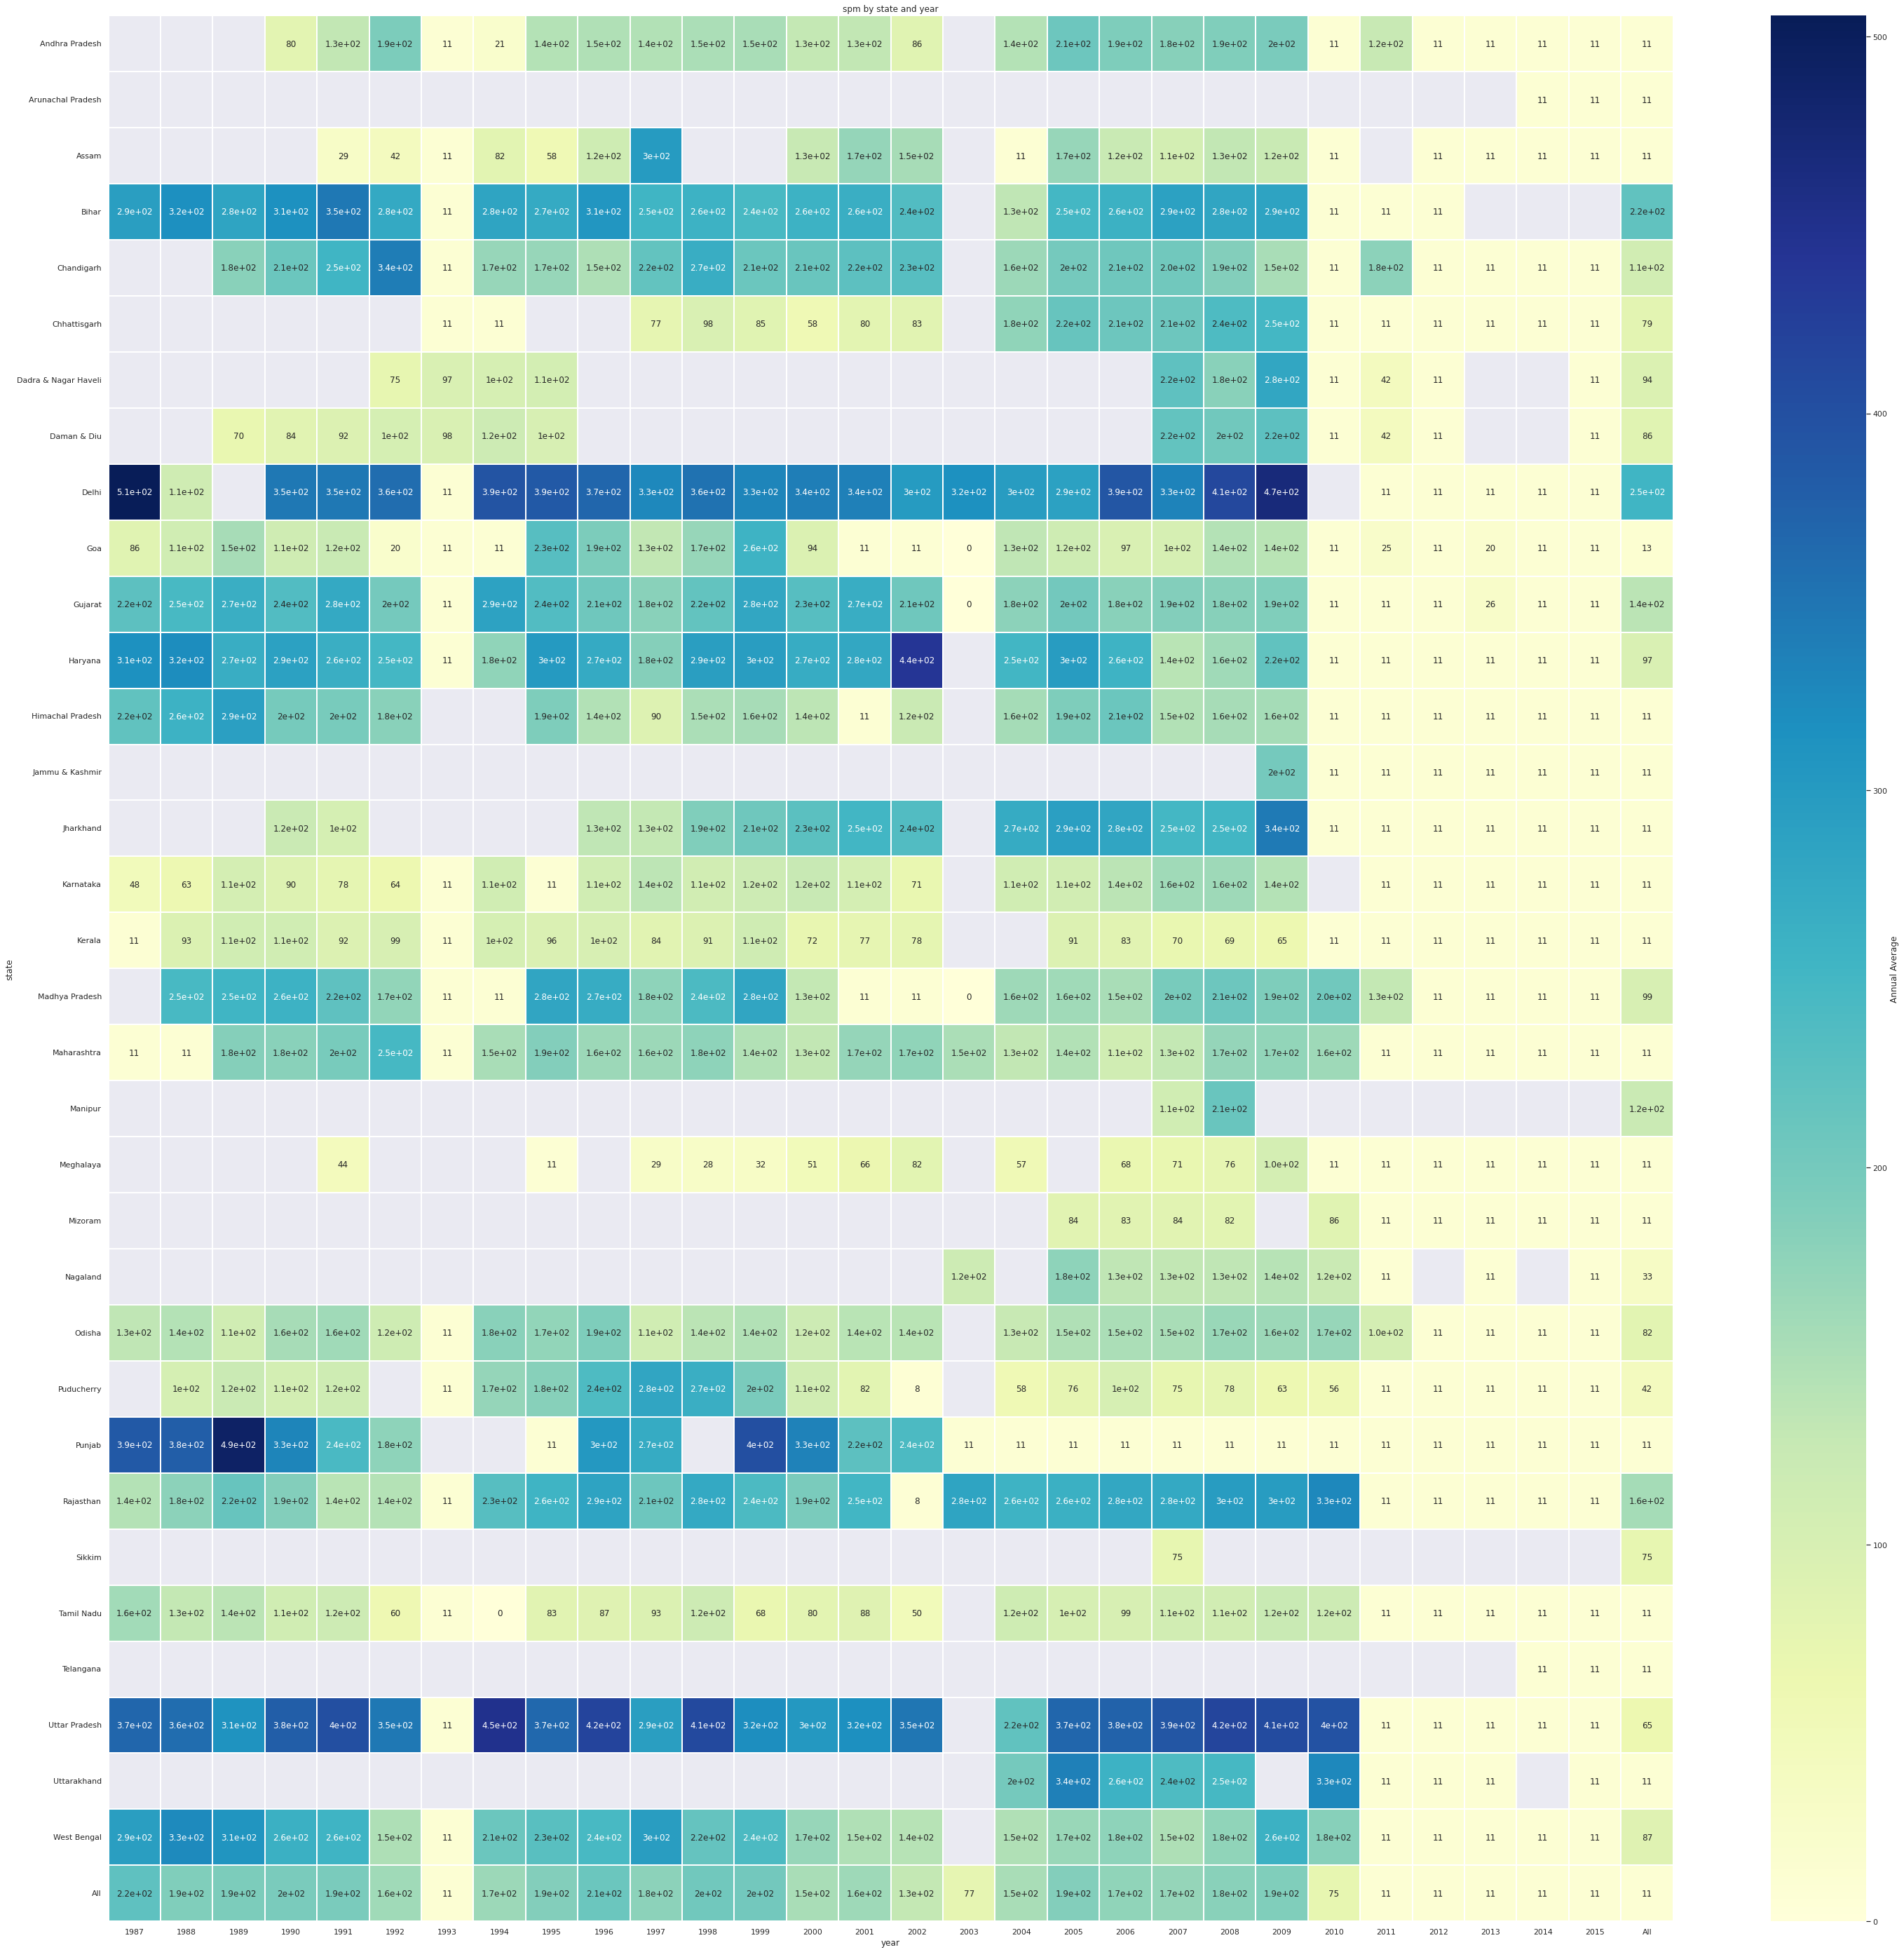

In [977]:
# heatmap of spm
f, ax = plt.subplots(figsize = (50,50))
ax.set_title('{} by state and year'.format('spm'))
sns.heatmap(data.pivot_table('spm', index='state',
                columns = ['year'], aggfunc = 'median', margins = True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax, cbar_kws = {'label': 'Annual Average'})

Here we see that states like Delhi, Haryana, Punjab, Uttar Pradesh have been the prime sufferers from the high concentration of spm.

# OBSERVATIONS FROM HEATMAPS
From the above analysis, we see that the states most affected by India's air pollution belong to the northern region.
Regions such as Delhi, Punjab, Uttar Pradesh, Haryana are highly polluted and in need of immediate action.
We also saw that even though the state has a high level of pollution, there are districts that have not been polluted.

#Visualising the emmissions according to the type(area) and getting the relevant statistics

In [978]:
type_emmissions=data.groupby('type').mean()[['so2','no2','rspm','spm','pm2_5']]
type_emmissions.head()

,so2,no2,rspm,spm,pm2_5
type,,,,,
I,13.218307,28.760126,110.115761,123.318219,11.419463
R,13.836224,16.970896,10.830468,264.696094,10.830468
RIRUO,10.912577,31.779908,103.617331,10.830468,22.771281
RO,10.353213,24.547749,97.404681,196.807011,10.830468
RRO,9.275288,23.111285,95.690985,47.202544,11.817746


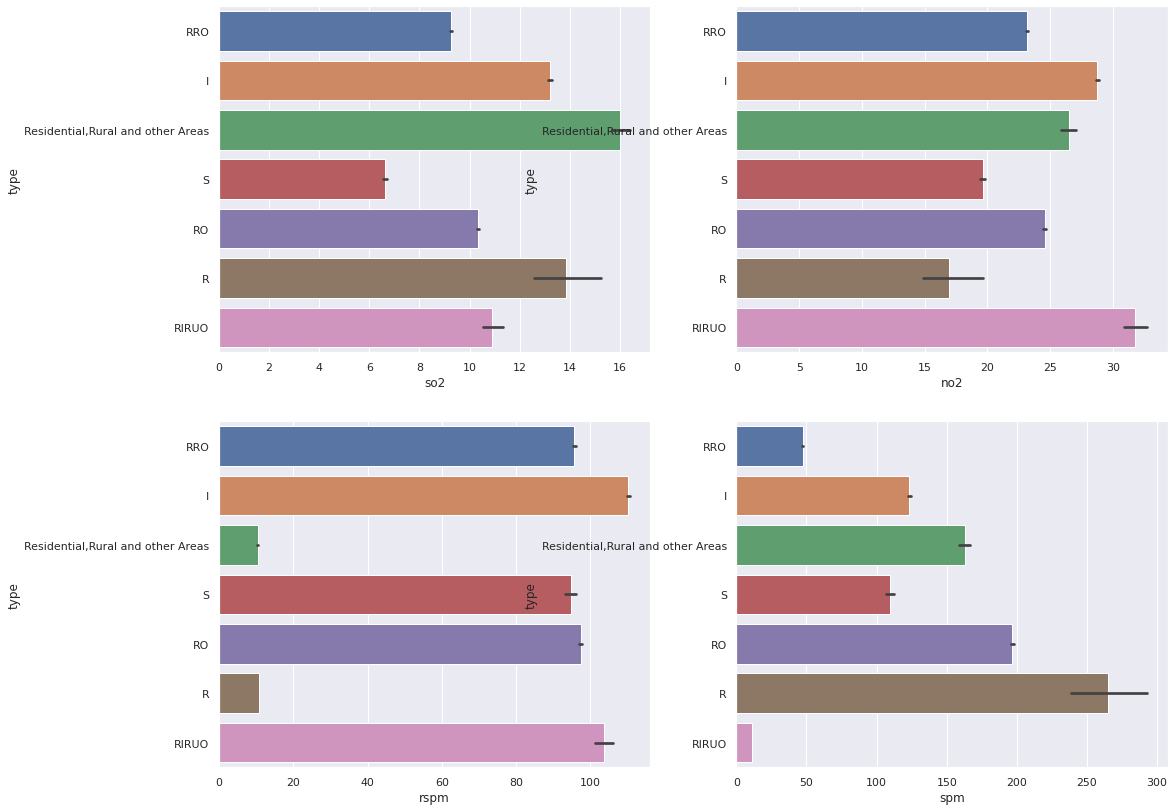

In [979]:
ig, axes = plt.subplots(nrows=2, ncols=2,figsize=(17,14))
ax = sns.barplot("so2", y="type",
                 data=data,
                 ax=axes[0,0]
                )
ax = sns.barplot("no2", y="type",
                 data=data,
                 ax=axes[0,1]
                )
ax = sns.barplot("rspm", y="type",
                 data=data,
                 ax=axes[1,0]
                )
ax = sns.barplot("spm", y="type",
                 data=data,
                 ax=axes[1,1]
                )

 Observation:It is the Industrial affluents that contribute highest percentage of all the pollutants in India

#CHECKING DATA DISTRIBUTION

Text(0.5, 1.0, 'spm')

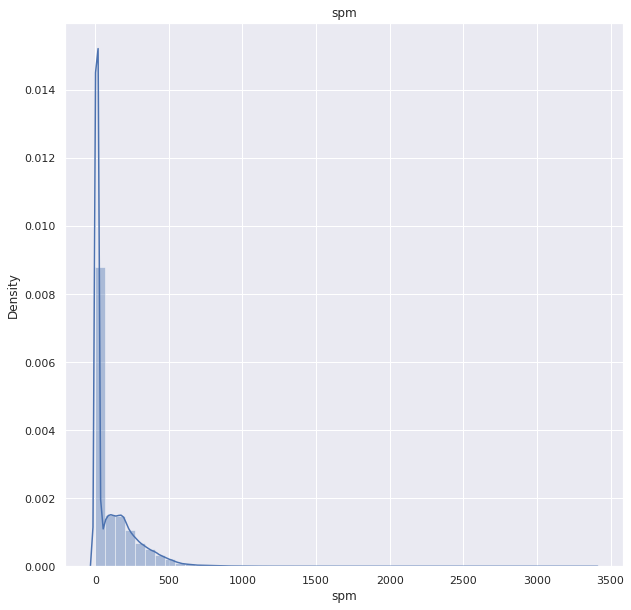

In [980]:
#plt.hist(data.spm,range=(0.0,4000)) #spm

#Checking distribution of data
sns.distplot(data.spm)
plt.title('spm')

Text(0.5, 1.0, 'so2')

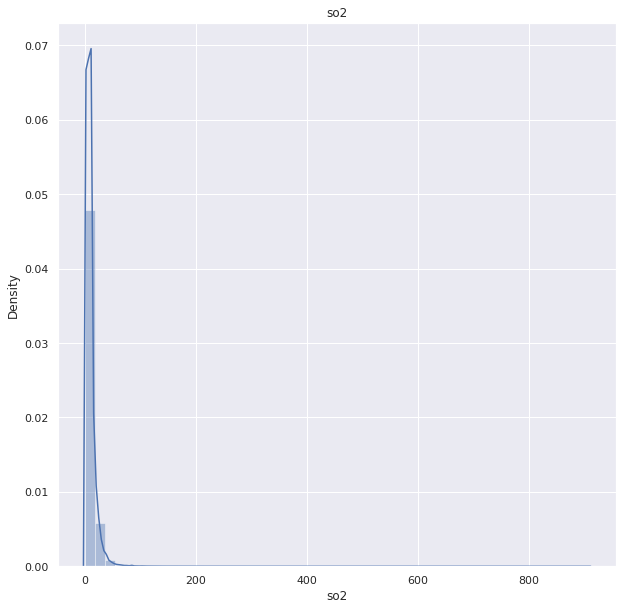

In [981]:
#plt.hist(data.so2,range=(0,1000)) #so2
sns.distplot(data.so2)
plt.title('so2')


Text(0.5, 1.0, 'no2')

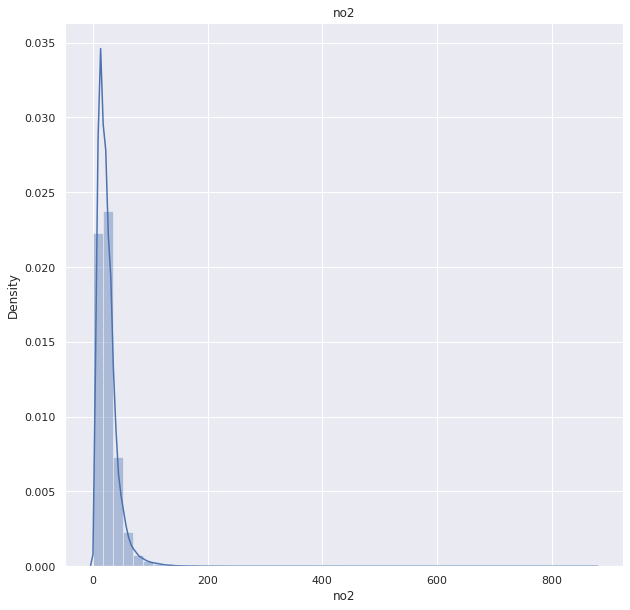

In [982]:
#plt.hist(data.no2,range=(0,1000)) #no2
sns.distplot(data.no2)
plt.title('no2')

Text(0.5, 1.0, 'rspm')

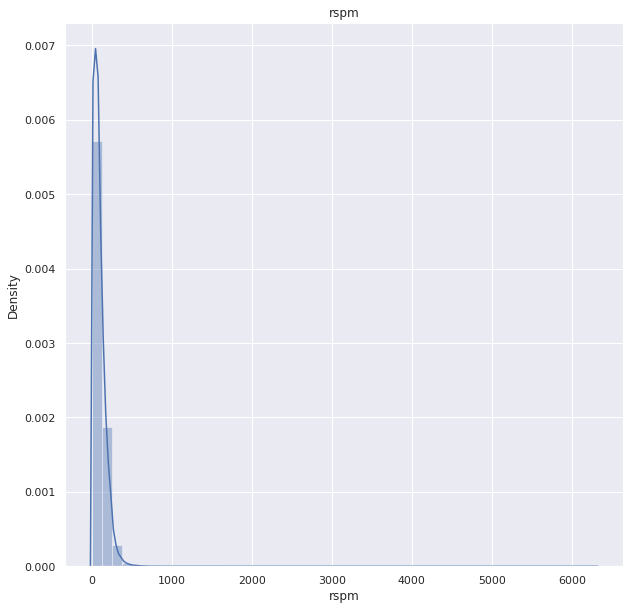

In [983]:
#plt.hist(data.rspm,range=(0,7000)) #rspm
sns.distplot(data.rspm)
plt.title('rspm')

Text(0.5, 1.0, 'pm2_5')

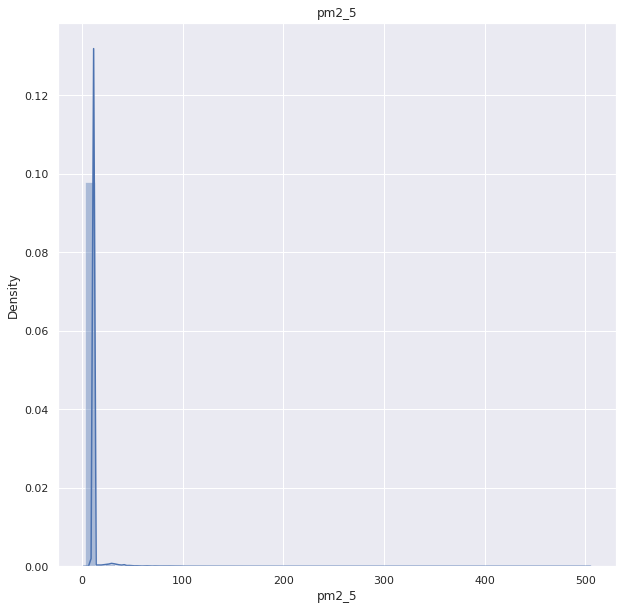

In [984]:
#plt.hist(data.pm2_5,range=(0,1000)) #pm2_5
sns.distplot(data.pm2_5)
plt.title('pm2_5')

#CALCULATE AIR QUALITY INDEX FOR SO2 BASED ON FORMULA
The AQI is an index for reporting daily air quality. It tells you how clean or polluted your air is, and what associated health effects might be a concern for us.
 

 


Function to calculate so2 individual pollutant index(si)
The index category for SO2 is scaled between 0-1600. So on applying formula which is used to calculate AQI

In [985]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
data['SOi']=data['so2'].apply(cal_SOi)
df= data[['so2','SOi']]
df.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


#CALCULATE AIR QUALITY INDEX FOR NO2 BASED ON FORMULA

Function to calculate no2 individual pollutant index(ni)¶
The index category for NO2 is scaled between 0-400. So on applying formula which is used to calculate AQI

In [986]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
data['Noi']=data['no2'].apply(cal_Noi)
df= data[['no2','Noi']]
df.head()

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


#CALCULATE AIR QUALITY INDEX FOR RSPM BASED ON FORMULA

Function to calculate rspm individual pollutant index(rpi)
The index category for rspm is scaled between 0-400. So on applying formula which is used to calculate AQI

In [987]:
def cal_RSPMi(rspm):
    rpi=0
    if(rspm<=100):
     rpi = rspm
    elif(rspm>=101 and rspm<=150):
     rpi= 101+(rspm-101)*((200-101)/(150-101))
    elif(rspm>=151 and rspm<=350):
     ni= 201+(rspm-151)*((300-201)/(350-151))
    elif(rspm>=351 and rspm<=420):
     ni= 301+(rspm-351)*((400-301)/(420-351))
    elif(rspm>420):
     ni= 401+(rspm-420)*((500-401)/(420-351))
    return rpi
data['RSPMi']=data['rspm'].apply(cal_RSPMi)
df= data[['rspm','RSPMi']]
df.head()

,rspm,RSPMi
0,10.830468,10.830468
1,10.830468,10.830468
2,10.830468,10.830468
3,10.830468,10.830468
4,10.830468,10.830468


In [988]:
df.tail()

,rspm,RSPMi
435734,148.0,195.959184
435735,131.0,161.612245
435736,140.0,179.795918
435737,143.0,185.857143
435738,171.0,0.000000


#CALCULATE AIR QUALITY INDEX FOR SPM BASED ON FORMULA

Function to calculate spm individual pollutant index(spi)¶
The index category for rspm is scaled between 0-430. So on applying formula which is used to calculate AQI

In [989]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
   
data['SPMi']=data['spm'].apply(cal_SPMi)
df= data[['spm','SPMi']]
df.head()

,spm,SPMi
0,10.830468,10.830468
1,10.830468,10.830468
2,10.830468,10.830468
3,10.830468,10.830468
4,10.830468,10.830468


##CALCULATE AIR QUALITY INDEX FOR PM 2.5 BASED ON FORMULA

Function to calculate pm2_5 individual pollutant index(pmi)¶
The index category for rspm is scaled between 0-430. So on applying formula which is used to calculate AQI

In [990]:
def cal_pmi(pm2_5):
    pmi=0
    if(pm2_5<=50):
     pmi=pm2_5*(50/50)
    elif(pm2_5>50 and pm2_5<=100):
     pmi=50+(pm2_5-50)*(50/50)
    elif(pm2_5>100 and pm2_5<=250):
     pmi= 100+(pm2_5-100)*(100/150)
    elif(pm2_5>250 and pm2_5<=350):
     pmi=200+(pm2_5-250)*(100/100)
    elif(pm2_5>350 and pm2_5<=450):
     pmi=300+(pm2_5-350)*(100/100)
    else:
     pmi=400+(pm2_5-430)*(100/80)
    return pmi
data['PMi']=data['pm2_5'].apply(cal_pmi)
df= data[['pm2_5','PMi']]


In [991]:

df.head()


,pm2_5,PMi
0,10.830468,10.830468
1,10.830468,10.830468
2,10.830468,10.830468
3,10.830468,10.830468
4,10.830468,10.830468


In [992]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi ):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi ):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

data['AQI']=data.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['RSPMi'],x['SPMi']),axis=1)
df= data[['state','SOi','Noi','RSPMi','SPMi','AQI']]
df.head()

,state,SOi,Noi,RSPMi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,10.830468,10.830468,21.750
1,Andhra Pradesh,3.875,8.750,10.830468,10.830468,0.000
2,Andhra Pradesh,7.750,35.625,10.830468,10.830468,35.625
3,Andhra Pradesh,7.875,18.375,10.830468,10.830468,18.375
4,Andhra Pradesh,5.875,9.375,10.830468,10.830468,0.000


In [993]:
data.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year,SOi,Noi,RSPMi,SPMi,PMi,AQI
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,10.830468,10.830468,10.830468,1990-02-01,1990,6.000,21.750,10.830468,10.830468,10.830468,21.750
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,10.830468,10.830468,10.830468,1990-02-01,1990,3.875,8.750,10.830468,10.830468,10.830468,0.000
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,10.830468,10.830468,10.830468,1990-02-01,1990,7.750,35.625,10.830468,10.830468,10.830468,35.625
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,10.830468,10.830468,10.830468,1990-03-01,1990,7.875,18.375,10.830468,10.830468,10.830468,18.375
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,10.830468,10.830468,10.830468,1990-03-01,1990,5.875,9.375,10.830468,10.830468,10.830468,0.000


Function to calculate the air quality index (AQI) of every data value its is calculated as per indian govt standards
The purpose of the AQI is to help you understand what local air quality means to your health. Also it is scaled from 0 to 500.

#AQI RANGE for corresponding AQI value

In [994]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

data['AQI_Range'] = data['AQI'] .apply(AQI_Range)
data.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year,SOi,Noi,RSPMi,SPMi,PMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,10.830468,10.830468,10.830468,1990-02-01,1990,6.000,21.750,10.830468,10.830468,10.830468,21.750,Good
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,10.830468,10.830468,10.830468,1990-02-01,1990,3.875,8.750,10.830468,10.830468,10.830468,0.000,Good
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,10.830468,10.830468,10.830468,1990-02-01,1990,7.750,35.625,10.830468,10.830468,10.830468,35.625,Good
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,10.830468,10.830468,10.830468,1990-03-01,1990,7.875,18.375,10.830468,10.830468,10.830468,18.375,Good
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,10.830468,10.830468,10.830468,1990-03-01,1990,5.875,9.375,10.830468,10.830468,10.830468,0.000,Good


In [995]:
d=data #saving data in new value
d.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year,SOi,Noi,RSPMi,SPMi,PMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,10.830468,10.830468,10.830468,1990-02-01,1990,6.000,21.750,10.830468,10.830468,10.830468,21.750,Good
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,10.830468,10.830468,10.830468,1990-02-01,1990,3.875,8.750,10.830468,10.830468,10.830468,0.000,Good
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,10.830468,10.830468,10.830468,1990-02-01,1990,7.750,35.625,10.830468,10.830468,10.830468,35.625,Good
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,10.830468,10.830468,10.830468,1990-03-01,1990,7.875,18.375,10.830468,10.830468,10.830468,18.375,Good
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,10.830468,10.830468,10.830468,1990-03-01,1990,5.875,9.375,10.830468,10.830468,10.830468,0.000,Good


In [996]:
data=data.dropna(subset=['spm']) #spm

In [997]:
data=data.dropna(subset=['pm2_5']) #pm2_5

In [998]:
data.isna().sum() #all null values removed 

state        0
location     0
type         0
so2          0
no2          0
rspm         0
spm          0
pm2_5        0
date         0
year         0
SOi          0
Noi          0
RSPMi        0
SPMi         0
PMi          0
AQI          0
AQI_Range    0
dtype: int64

#checking for balance/imbalance data

In [999]:
#checking for balance data
data.value_counts('AQI_Range')

AQI_Range
Poor              140133
Moderate          128294
Good              100443
Unhealthy          31706
Hazardous          18673
Very unhealthy     15812
dtype: int64

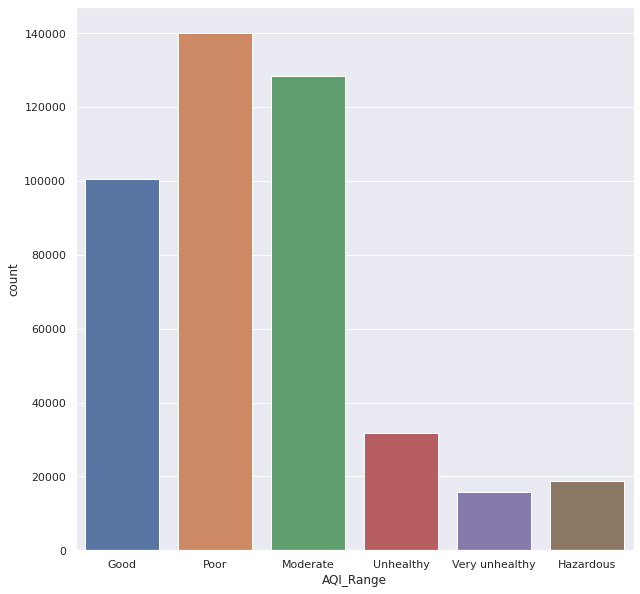

In [1000]:
sns.countplot(data.AQI_Range)
sns.set(rc={'figure.figsize':(4,4)})

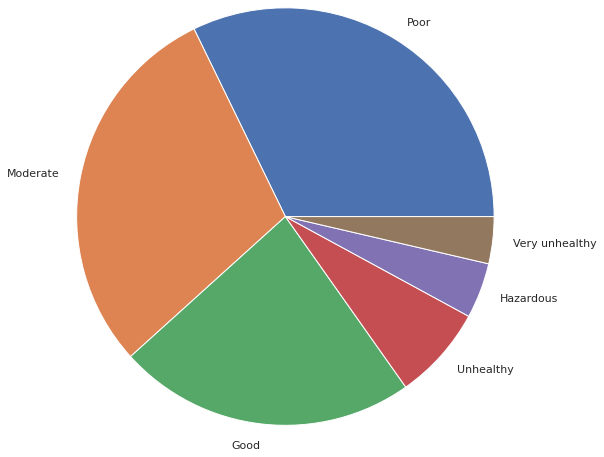

In [1001]:
data.AQI_Range.value_counts().plot(kind='pie',radius = 2.4)



OBSERAVTIONS:  Classes are highly imbalanced

BALANCING IMBALANCED DATA USING OVERSAMPLING TECHNIQUE:

In [1002]:
from sklearn.utils import resample

# Separate Target Classes
df_1 = data[data.AQI_Range=="Good"]
df_2 = data[data.AQI_Range=="Poor"]
df_3 = data[data.AQI_Range=="Moderate"]
df_4 = data[data.AQI_Range=="Unhealthy"]
df_5 = data[data.AQI_Range=="Very unhealthy"]
df_6 = data[data.AQI_Range=="Hazardous"]
# Upsample minority class
df_1_upsampled = resample(df_1, 
                                 replace=True,     # sample with replacement
                                 n_samples=140133,    # to match majority class
                                 random_state=123) # reproducible results

df_3_upsampled = resample(df_3, 
                                 replace=True,     # sample with replacement
                                 n_samples=140133,    # to match majority class
                                 random_state=123) # reproducible results     

df_4_upsampled = resample(df_4, 
                                 replace=True,     # sample with replacement
                                 n_samples=140133,    # to match majority class
                                 random_state=123) # reproducible results     
df_5_upsampled = resample(df_5, 
                                 replace=True,     # sample with replacement
                                 n_samples=140133,    # to match majority class
                                 random_state=123) # reproducible results    
df_6_upsampled = resample(df_6, 
                                 replace=True,     # sample with replacement
                                 n_samples=140133,    # to match majority class
                                 random_state=123) # reproducible results            
                                                     
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_2, df_1_upsampled,df_3_upsampled,df_4_upsampled,df_5_upsampled,df_6_upsampled])
 
# Display new class counts
df_upsampled.AQI_Range.value_counts()

Hazardous         140133
Unhealthy         140133
Poor              140133
Good              140133
Very unhealthy    140133
Moderate          140133
Name: AQI_Range, dtype: int64

In [1003]:
df_upsampled

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year,SOi,Noi,RSPMi,SPMi,PMi,AQI,AQI_Range
11,Andhra Pradesh,Hyderabad,RRO,3.9,14.1,10.830468,133.0,10.830468,1990-06-01,1990,4.875000,17.625,10.830468,122.000000,10.830468,122.000000,Poor
13,Andhra Pradesh,Hyderabad,RRO,3.3,19.3,10.830468,111.0,10.830468,1990-06-01,1990,4.125000,24.125,10.830468,107.333333,10.830468,107.333333,Poor
14,Andhra Pradesh,Hyderabad,RRO,3.9,8.2,10.830468,118.0,10.830468,1990-07-01,1990,4.875000,10.250,10.830468,112.000000,10.830468,112.000000,Poor
15,Andhra Pradesh,Hyderabad,RRO,3.5,12.1,10.830468,135.0,10.830468,1990-07-01,1990,4.375000,15.125,10.830468,123.333333,10.830468,123.333333,Poor
17,Andhra Pradesh,Hyderabad,RRO,4.0,9.9,10.830468,179.0,10.830468,1990-08-01,1990,5.000000,12.375,10.830468,152.666667,10.830468,152.666667,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288977,Puducherry,Pondichery,I,110.2,99.6,10.830468,441.0,10.830468,1999-07-01,1999,110.066667,119.600,10.830468,402.558140,10.830468,402.558140,Hazardous
383763,Uttar Pradesh,Lucknow,I,9.1,37.3,223.000000,464.0,10.830468,2008-02-05,2008,11.375000,46.625,0.000000,407.906977,10.830468,407.906977,Hazardous
109564,Himachal Pradesh,Baddi,I,2.9,11.1,10.830468,671.0,10.830468,2007-07-05,2007,3.625000,13.875,10.830468,456.046512,10.830468,456.046512,Hazardous
297613,Punjab,Amritsar,I,13.7,35.8,10.830468,517.0,10.830468,2007-08-05,2007,17.125000,44.750,10.830468,420.232558,10.830468,420.232558,Hazardous


AFTER OVERSAMPLING:

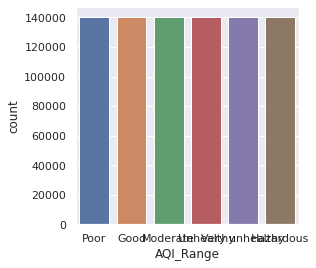

In [1004]:
sns.countplot(df_upsampled.AQI_Range)
sns.set(rc={'figure.figsize':(10,10)})

#Checking Outliers

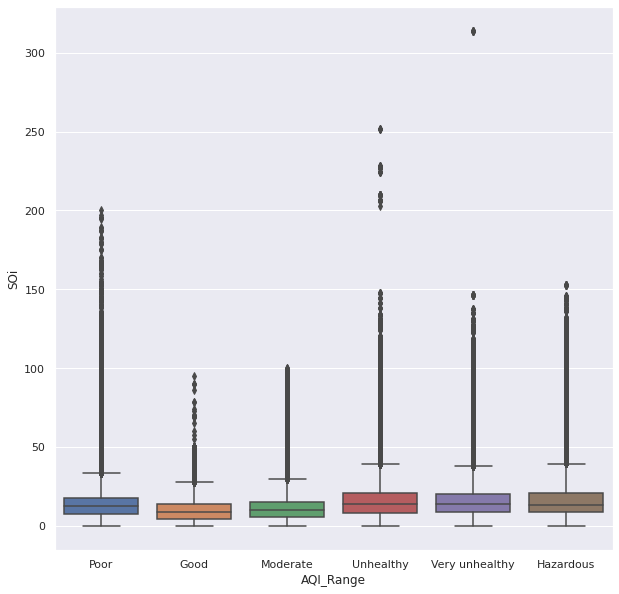

In [1005]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.SOi)
sns.set(rc={'figure.figsize':(10,10)})

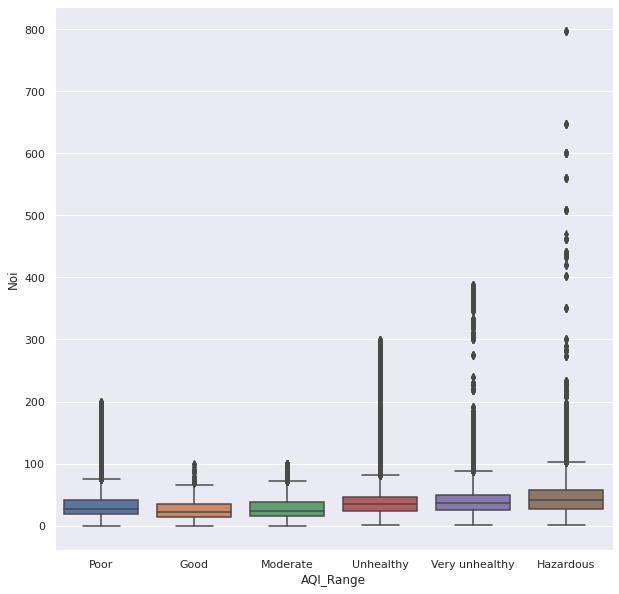

In [1006]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.Noi)
sns.set(rc={'figure.figsize':(10,10)})

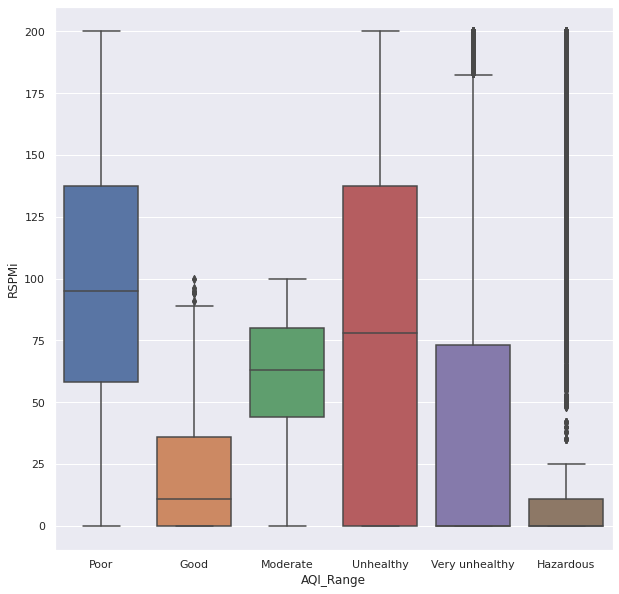

In [1007]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.RSPMi)
sns.set(rc={'figure.figsize':(10,10)})

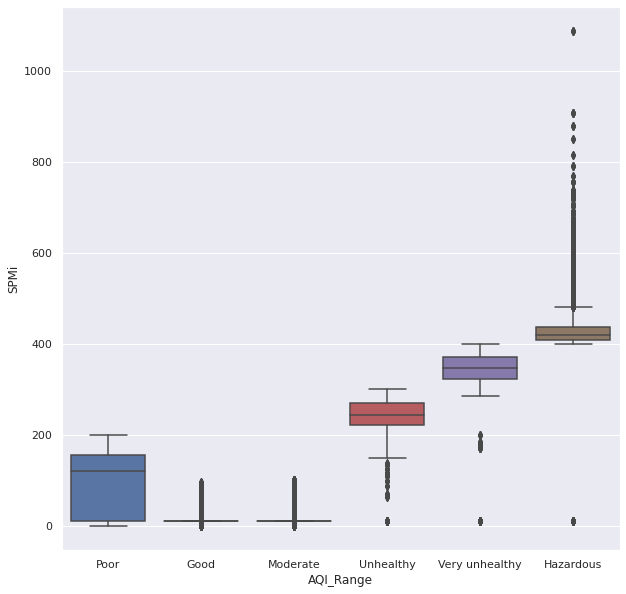

In [1008]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.SPMi)
sns.set(rc={'figure.figsize':(10,10)})

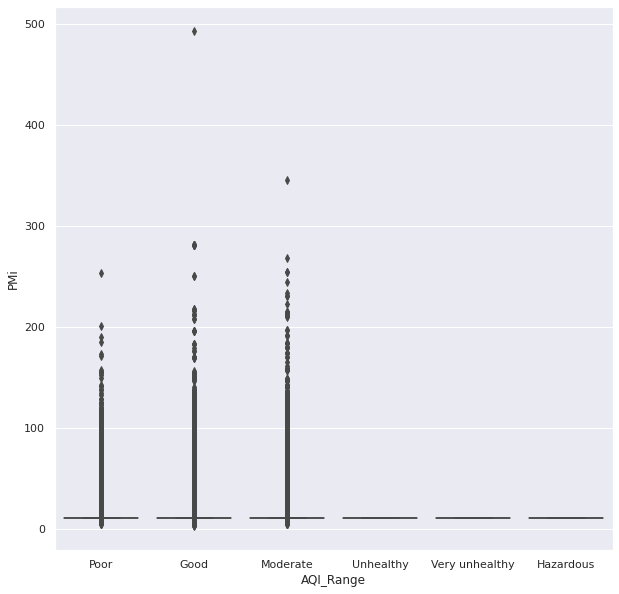

In [1009]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.PMi)
sns.set(rc={'figure.figsize':(10,10)})

In [1010]:
def Outlier(data):
    sorted(data)
    Q1,Q3=np.percentile(data,[25,75])
    IQR=Q3-Q1
    lower=Q1-(1.5*IQR)
    upper=Q3+(1.5*IQR)
    return lower,upper

#OUTLIER DETECTION & REMOVAL

#SOi

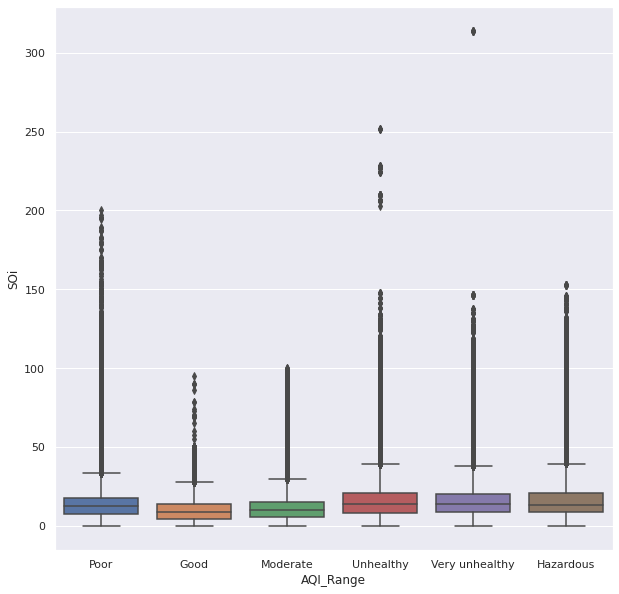

In [1011]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.SOi)
sns.set(rc={'figure.figsize':(10,10)})

In [1012]:
df_upsampled.AQI_Range.value_counts()

Hazardous         140133
Unhealthy         140133
Poor              140133
Good              140133
Very unhealthy    140133
Moderate          140133
Name: AQI_Range, dtype: int64

In [1013]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Good'].SOi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Good')&(df_upsampled.SOi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Good')&(df_upsampled.SOi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Hazardous         140133
Unhealthy         140133
Poor              140133
Very unhealthy    140133
Moderate          140133
Good              134830
Name: AQI_Range, dtype: int64

In [1014]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Poor'].SOi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Poor')&(df_upsampled.SOi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Poor')&(df_upsampled.SOi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Hazardous         140133
Unhealthy         140133
Very unhealthy    140133
Moderate          140133
Good              134830
Poor              130982
Name: AQI_Range, dtype: int64

In [1015]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Moderate'].SOi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Moderate')&(df_upsampled.SOi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Moderate')&(df_upsampled.SOi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Hazardous         140133
Unhealthy         140133
Very unhealthy    140133
Good              134830
Moderate          131693
Poor              130982
Name: AQI_Range, dtype: int64

In [1016]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Unhealthy'].SOi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Unhealthy')&(df_upsampled.SOi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Unhealthy')&(df_upsampled.SOi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Hazardous         140133
Very unhealthy    140133
Good              134830
Moderate          131693
Unhealthy         131278
Poor              130982
Name: AQI_Range, dtype: int64

In [1017]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Hazardous'].SOi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SOi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SOi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Very unhealthy    140133
Good              134830
Moderate          131693
Unhealthy         131278
Poor              130982
Hazardous         130662
Name: AQI_Range, dtype: int64

In [1018]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Very unhealthy'].SOi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Very unhealthy')&(df_upsampled.SOi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Very unhealthy')&(df_upsampled.SOi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134830
Moderate          131693
Unhealthy         131278
Poor              130982
Hazardous         130662
Very unhealthy    129841
Name: AQI_Range, dtype: int64

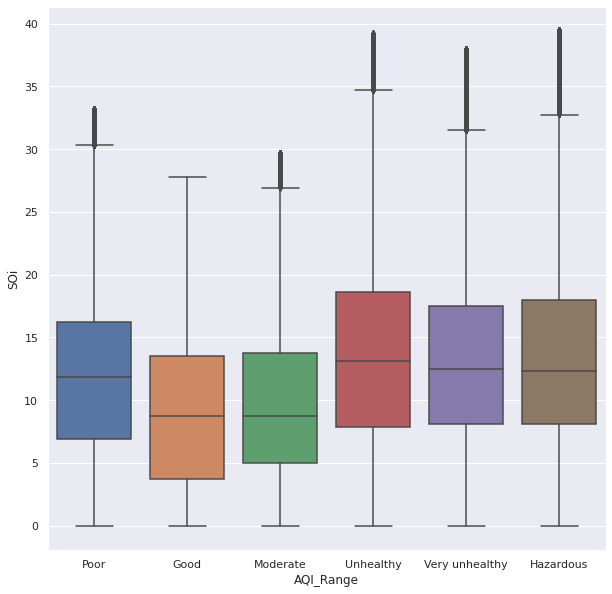

In [1019]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.SOi)
sns.set(rc={'figure.figsize':(10,10)})

In [1020]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Poor'].SOi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Poor')&(df_upsampled.SOi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Poor')&(df_upsampled.SOi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134830
Moderate          131693
Unhealthy         131278
Hazardous         130662
Very unhealthy    129841
Poor              128561
Name: AQI_Range, dtype: int64

In [1021]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Moderate'].SOi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Moderate')&(df_upsampled.SOi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Moderate')&(df_upsampled.SOi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134830
Unhealthy         131278
Hazardous         130662
Moderate          129842
Very unhealthy    129841
Poor              128561
Name: AQI_Range, dtype: int64

In [1022]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Unhealthy'].SOi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Unhealthy')&(df_upsampled.SOi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Unhealthy')&(df_upsampled.SOi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134830
Hazardous         130662
Moderate          129842
Very unhealthy    129841
Unhealthy         128842
Poor              128561
Name: AQI_Range, dtype: int64

In [1023]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Hazardous'].SOi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SOi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SOi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134830
Moderate          129842
Very unhealthy    129841
Unhealthy         128842
Poor              128561
Hazardous         125189
Name: AQI_Range, dtype: int64

In [1024]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Very unhealthy'].SOi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Very unhealthy')&(df_upsampled.SOi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Very unhealthy')&(df_upsampled.SOi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134830
Moderate          129842
Unhealthy         128842
Poor              128561
Very unhealthy    125847
Hazardous         125189
Name: AQI_Range, dtype: int64

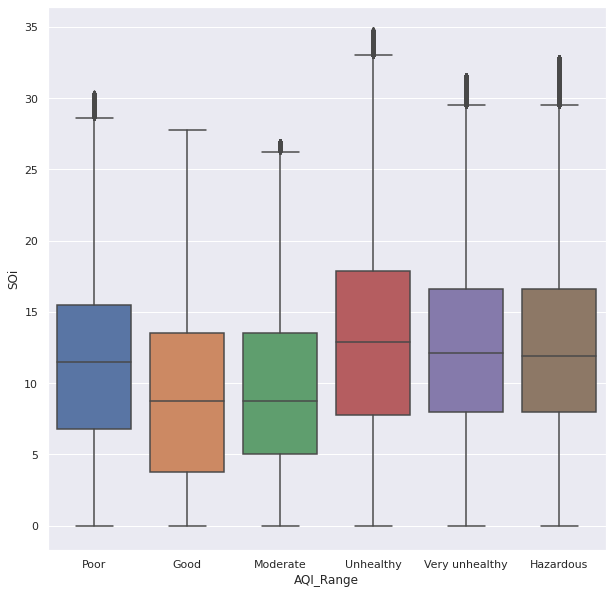

In [1025]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.SOi)
sns.set(rc={'figure.figsize':(10,10)})

In [1026]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Poor'].SOi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Poor')&(df_upsampled.SOi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Poor')&(df_upsampled.SOi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134830
Moderate          129842
Unhealthy         128842
Poor              126279
Very unhealthy    125847
Hazardous         125189
Name: AQI_Range, dtype: int64

In [1027]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Unhealthy'].SOi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Unhealthy')&(df_upsampled.SOi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Unhealthy')&(df_upsampled.SOi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134830
Moderate          129842
Unhealthy         127381
Poor              126279
Very unhealthy    125847
Hazardous         125189
Name: AQI_Range, dtype: int64

In [1028]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Hazardous'].SOi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SOi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SOi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134830
Moderate          129842
Unhealthy         127381
Poor              126279
Very unhealthy    125847
Hazardous         121568
Name: AQI_Range, dtype: int64

In [1029]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Very unhealthy'].SOi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Very unhealthy')&(df_upsampled.SOi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Very unhealthy')&(df_upsampled.SOi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134830
Moderate          129842
Unhealthy         127381
Poor              126279
Very unhealthy    123957
Hazardous         121568
Name: AQI_Range, dtype: int64

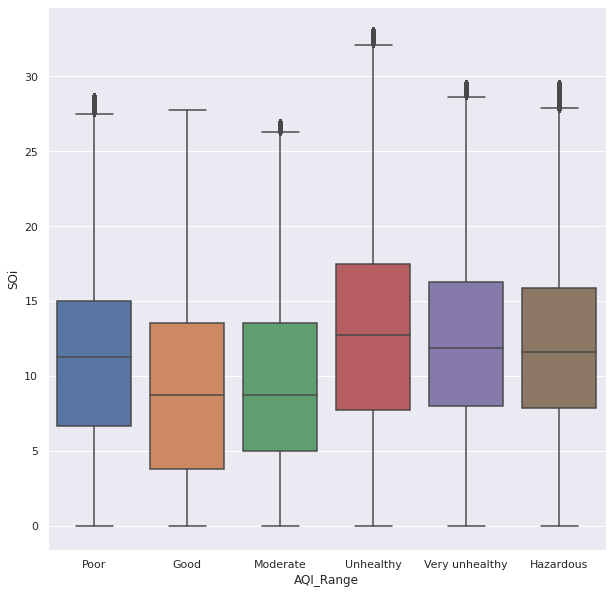

In [1030]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.SOi)
sns.set(rc={'figure.figsize':(10,10)})

In [1031]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Poor'].SOi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Poor')&(df_upsampled.SOi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Poor')&(df_upsampled.SOi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134830
Moderate          129842
Unhealthy         127381
Poor              125489
Very unhealthy    123957
Hazardous         121568
Name: AQI_Range, dtype: int64

In [1032]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Moderate'].SOi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Moderate')&(df_upsampled.SOi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Moderate')&(df_upsampled.SOi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134830
Moderate          129740
Unhealthy         127381
Poor              125489
Very unhealthy    123957
Hazardous         121568
Name: AQI_Range, dtype: int64

In [1033]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Unhealthy'].SOi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Unhealthy')&(df_upsampled.SOi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Unhealthy')&(df_upsampled.SOi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134830
Moderate          129740
Unhealthy         126569
Poor              125489
Very unhealthy    123957
Hazardous         121568
Name: AQI_Range, dtype: int64

In [1034]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Hazardous'].SOi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SOi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SOi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134830
Moderate          129740
Unhealthy         126569
Poor              125489
Very unhealthy    123957
Hazardous         119128
Name: AQI_Range, dtype: int64

In [1035]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Very unhealthy'].SOi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Very unhealthy')&(df_upsampled.SOi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Very unhealthy')&(df_upsampled.SOi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134830
Moderate          129740
Unhealthy         126569
Poor              125489
Very unhealthy    122999
Hazardous         119128
Name: AQI_Range, dtype: int64

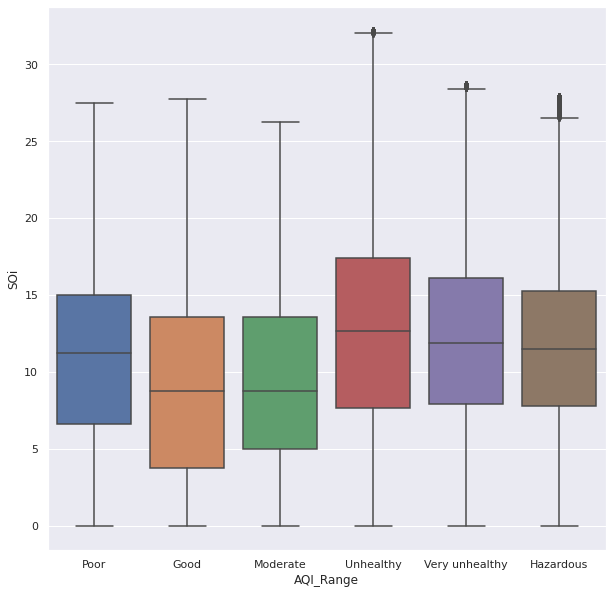

In [1036]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.SOi)
sns.set(rc={'figure.figsize':(10,10)})

In [1037]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Unhealthy'].SOi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Unhealthy')&(df_upsampled.SOi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Unhealthy')&(df_upsampled.SOi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134830
Moderate          129740
Unhealthy         126455
Poor              125489
Very unhealthy    122999
Hazardous         119128
Name: AQI_Range, dtype: int64

In [1038]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Very unhealthy'].SOi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Very unhealthy')&(df_upsampled.SOi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Very unhealthy')&(df_upsampled.SOi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134830
Moderate          129740
Unhealthy         126455
Poor              125489
Very unhealthy    122734
Hazardous         119128
Name: AQI_Range, dtype: int64

In [1039]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Hazardous'].SOi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SOi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SOi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134830
Moderate          129740
Unhealthy         126455
Poor              125489
Very unhealthy    122734
Hazardous         116661
Name: AQI_Range, dtype: int64

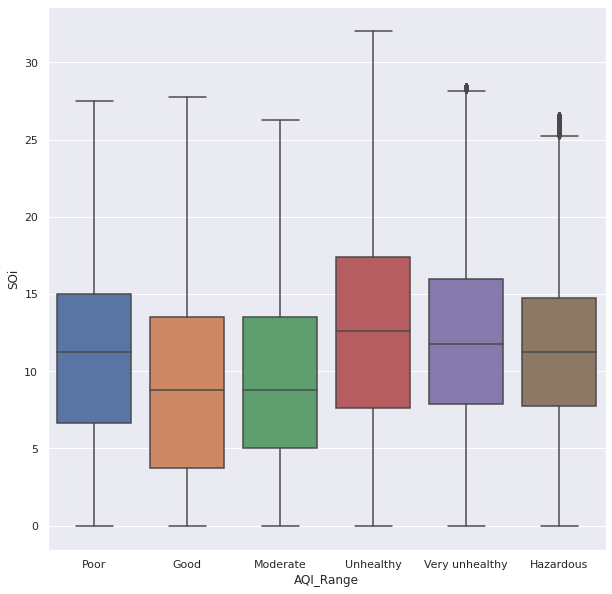

In [1040]:
df_upsampled.AQI_Range.value_counts()
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.SOi)
sns.set(rc={'figure.figsize':(10,10)})

In [1041]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Unhealthy'].SOi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Unhealthy')&(df_upsampled.SOi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Unhealthy')&(df_upsampled.SOi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134830
Moderate          129740
Unhealthy         126455
Poor              125489
Very unhealthy    122734
Hazardous         116661
Name: AQI_Range, dtype: int64

In [1042]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Very unhealthy'].SOi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Very unhealthy')&(df_upsampled.SOi < lr)],inplace=True)

df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Very unhealthy')&(df_upsampled.SOi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134830
Moderate          129740
Unhealthy         126455
Poor              125489
Very unhealthy    122459
Hazardous         116661
Name: AQI_Range, dtype: int64

In [1043]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Hazardous'].SOi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SOi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SOi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134830
Moderate          129740
Unhealthy         126455
Poor              125489
Very unhealthy    122459
Hazardous         114040
Name: AQI_Range, dtype: int64

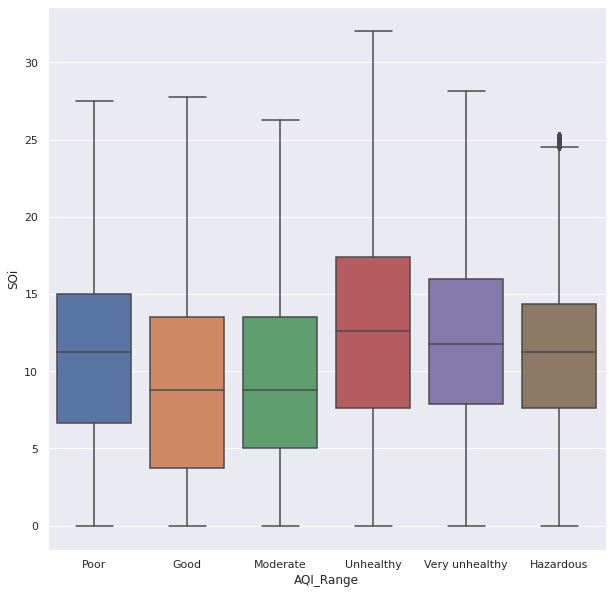

In [1044]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.SOi)
sns.set(rc={'figure.figsize':(10,10)})

In [1045]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Hazardous'].SOi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SOi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SOi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134830
Moderate          129740
Unhealthy         126455
Poor              125489
Very unhealthy    122459
Hazardous         112263
Name: AQI_Range, dtype: int64

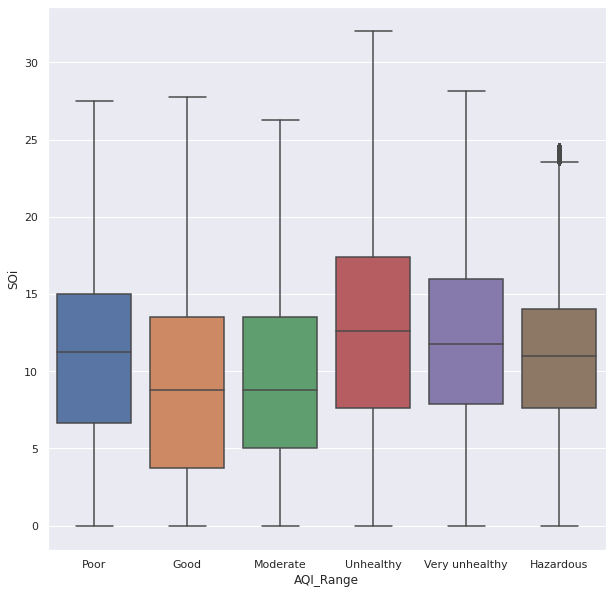

In [1046]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.SOi)
sns.set(rc={'figure.figsize':(10,10)})

In [1047]:
lr,ur=Outlier(df_upsampled[data.AQI_Range== 'Hazardous'].SOi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SOi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SOi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134830
Moderate          129740
Unhealthy         126455
Poor              125489
Very unhealthy    122459
Hazardous         110341
Name: AQI_Range, dtype: int64

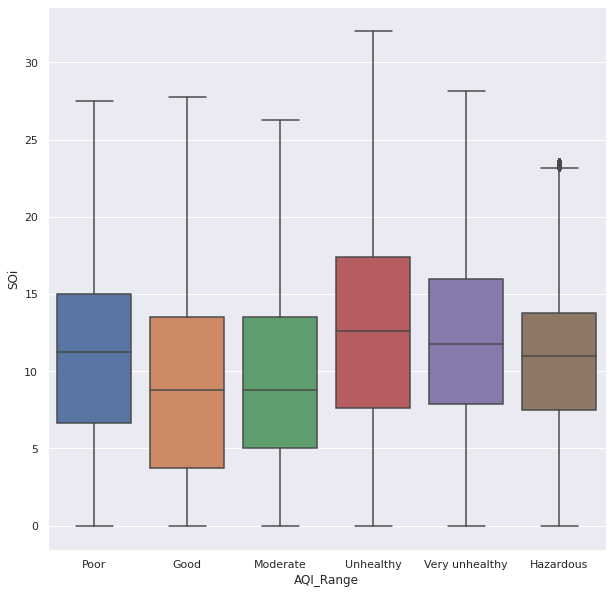

In [1048]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.SOi)
sns.set(rc={'figure.figsize':(10,10)})

In [1049]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Hazardous'].SOi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SOi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SOi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134830
Moderate          129740
Unhealthy         126455
Poor              125489
Very unhealthy    122459
Hazardous         109610
Name: AQI_Range, dtype: int64

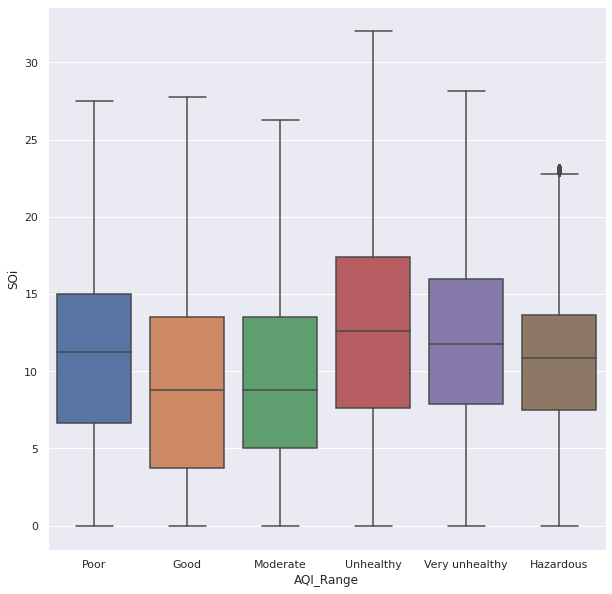

In [1050]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.SOi)
sns.set(rc={'figure.figsize':(10,10)})

In [1051]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Hazardous'].SOi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SOi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SOi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134830
Moderate          129740
Unhealthy         126455
Poor              125489
Very unhealthy    122459
Hazardous         109087
Name: AQI_Range, dtype: int64

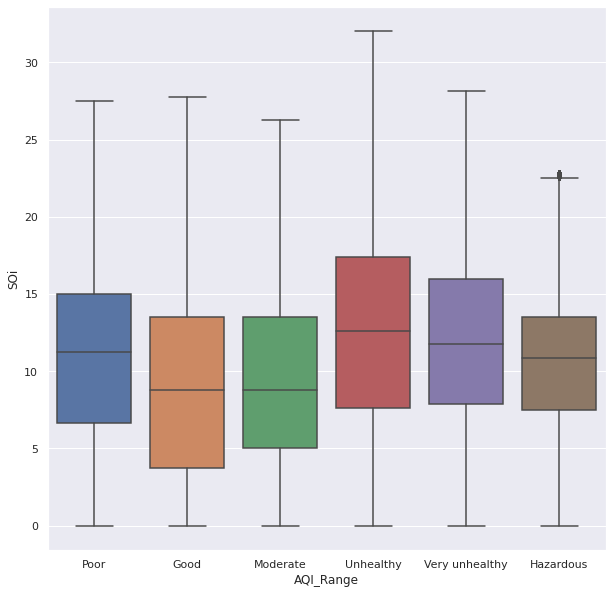

In [1052]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.SOi)
sns.set(rc={'figure.figsize':(10,10)})

In [1053]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Hazardous'].SOi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SOi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SOi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134830
Moderate          129740
Unhealthy         126455
Poor              125489
Very unhealthy    122459
Hazardous         108847
Name: AQI_Range, dtype: int64

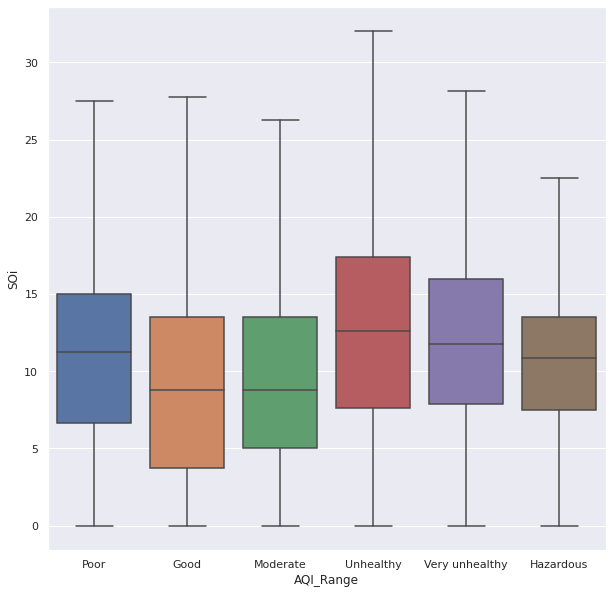

In [1054]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.SOi)
sns.set(rc={'figure.figsize':(10,10)})

#NOi

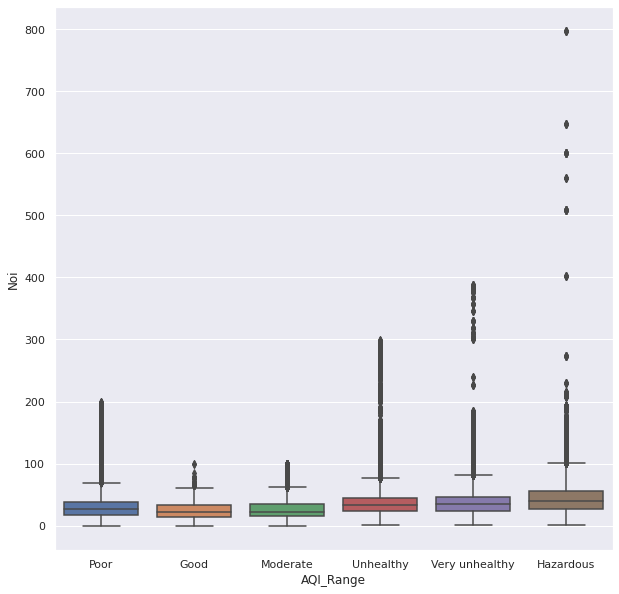

In [1055]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.Noi)
sns.set(rc={'figure.figsize':(10,10)})

In [1056]:
df_upsampled.AQI_Range.value_counts()

Good              134830
Moderate          129740
Unhealthy         126455
Poor              125489
Very unhealthy    122459
Hazardous         108847
Name: AQI_Range, dtype: int64

In [1057]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Good'].Noi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Good')&(df_upsampled.Noi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Good')&(df_upsampled.Noi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134797
Moderate          129740
Unhealthy         126455
Poor              125489
Very unhealthy    122459
Hazardous         108847
Name: AQI_Range, dtype: int64

In [1058]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Poor'].Noi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Poor')&(df_upsampled.Noi< lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Poor')&(df_upsampled.Noi> ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134797
Moderate          129740
Unhealthy         126455
Very unhealthy    122459
Poor              118276
Hazardous         108847
Name: AQI_Range, dtype: int64

In [1059]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Moderate'].Noi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Moderate')&(df_upsampled.Noi< lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Moderate')&(df_upsampled.Noi> ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134797
Unhealthy         126455
Very unhealthy    122459
Moderate          122193
Poor              118276
Hazardous         108847
Name: AQI_Range, dtype: int64

In [1060]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Unhealthy'].Noi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Unhealthy')&(df_upsampled.Noi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Unhealthy')&(df_upsampled.Noi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134797
Very unhealthy    122459
Moderate          122193
Unhealthy         118859
Poor              118276
Hazardous         108847
Name: AQI_Range, dtype: int64

In [1061]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Very unhealthy'].Noi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Very unhealthy')&(df_upsampled.Noi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Very unhealthy')&(df_upsampled.Noi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134797
Moderate          122193
Unhealthy         118859
Poor              118276
Very unhealthy    114207
Hazardous         108847
Name: AQI_Range, dtype: int64

In [1062]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Hazardous'].Noi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.Noi< lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.Noi> ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134797
Moderate          122193
Unhealthy         118859
Poor              118276
Very unhealthy    114207
Hazardous         101900
Name: AQI_Range, dtype: int64

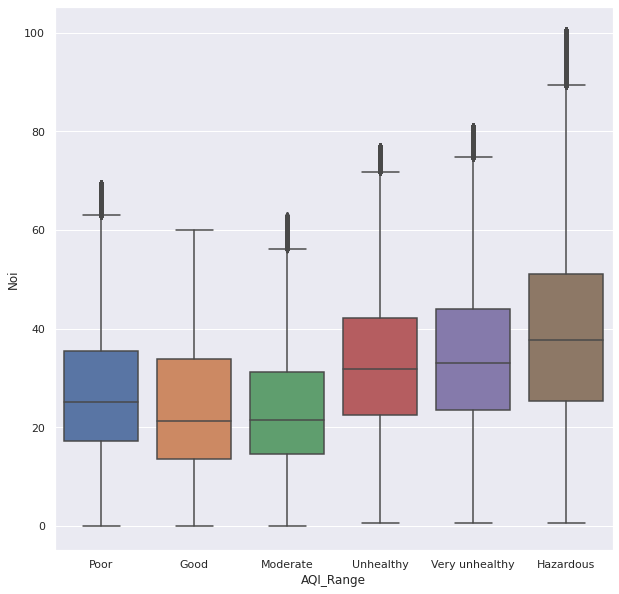

In [1063]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.Noi)
sns.set(rc={'figure.figsize':(10,10)})

In [1064]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Poor'].Noi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Poor')&(df_upsampled.Noi< lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Poor')&(df_upsampled.Noi> ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134797
Moderate          122193
Unhealthy         118859
Poor              115969
Very unhealthy    114207
Hazardous         101900
Name: AQI_Range, dtype: int64

In [1065]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Moderate'].Noi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Moderate')&(df_upsampled.Noi< lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Moderate')&(df_upsampled.Noi> ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134797
Unhealthy         118859
Moderate          117639
Poor              115969
Very unhealthy    114207
Hazardous         101900
Name: AQI_Range, dtype: int64

In [1066]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Unhealthy'].Noi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Unhealthy')&(df_upsampled.Noi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Unhealthy')&(df_upsampled.Noi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134797
Unhealthy         117689
Moderate          117639
Poor              115969
Very unhealthy    114207
Hazardous         101900
Name: AQI_Range, dtype: int64

In [1067]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Very unhealthy'].Noi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Very unhealthy')&(df_upsampled.Noi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Very unhealthy')&(df_upsampled.Noi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134797
Unhealthy         117689
Moderate          117639
Poor              115969
Very unhealthy    112780
Hazardous         101900
Name: AQI_Range, dtype: int64

In [1068]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Hazardous'].Noi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.Noi< lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.Noi> ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134797
Unhealthy         117689
Moderate          117639
Poor              115969
Very unhealthy    112780
Hazardous          98878
Name: AQI_Range, dtype: int64

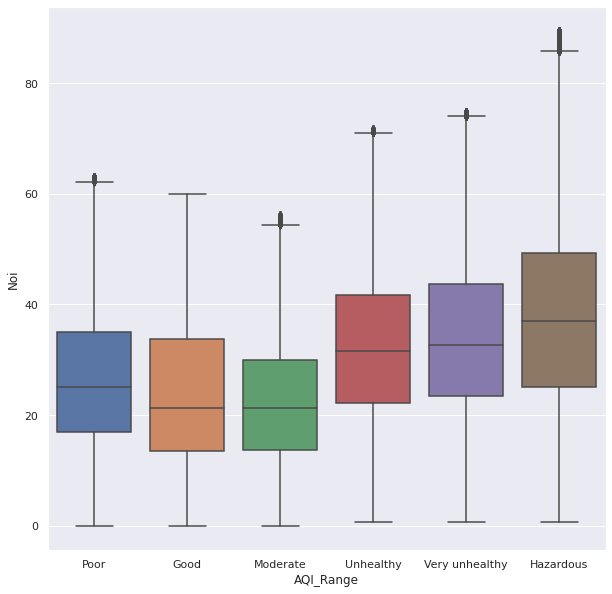

In [1069]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.Noi)
sns.set(rc={'figure.figsize':(10,10)})

In [1070]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Poor'].Noi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Poor')&(df_upsampled.Noi< lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Poor')&(df_upsampled.Noi> ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134797
Unhealthy         117689
Moderate          117639
Poor              115529
Very unhealthy    112780
Hazardous          98878
Name: AQI_Range, dtype: int64

In [1071]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Moderate'].Noi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Moderate')&(df_upsampled.Noi< lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Moderate')&(df_upsampled.Noi> ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134797
Unhealthy         117689
Moderate          116299
Poor              115529
Very unhealthy    112780
Hazardous          98878
Name: AQI_Range, dtype: int64

In [1072]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Unhealthy'].Noi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Unhealthy')&(df_upsampled.Noi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Unhealthy')&(df_upsampled.Noi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134797
Unhealthy         117475
Moderate          116299
Poor              115529
Very unhealthy    112780
Hazardous          98878
Name: AQI_Range, dtype: int64

In [1073]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Very unhealthy'].Noi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Very unhealthy')&(df_upsampled.Noi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Very unhealthy')&(df_upsampled.Noi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134797
Unhealthy         117475
Moderate          116299
Poor              115529
Very unhealthy    112547
Hazardous          98878
Name: AQI_Range, dtype: int64

In [1074]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Hazardous'].Noi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.Noi< lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.Noi> ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134797
Unhealthy         117475
Moderate          116299
Poor              115529
Very unhealthy    112547
Hazardous          97805
Name: AQI_Range, dtype: int64

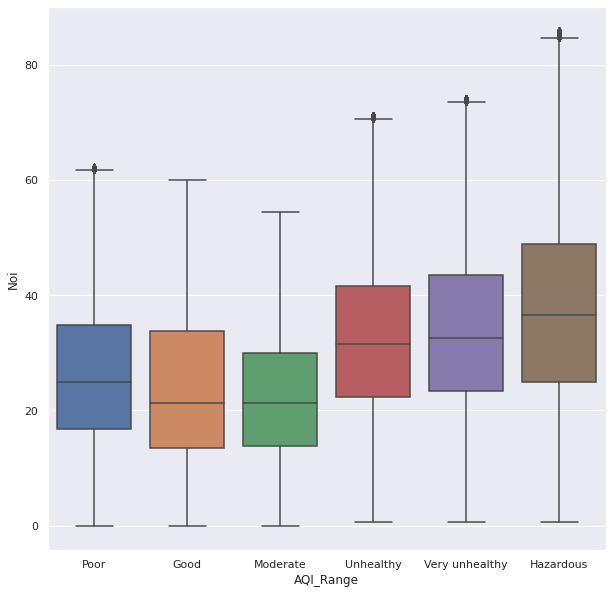

In [1075]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.Noi)
sns.set(rc={'figure.figsize':(10,10)})

In [1076]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Poor'].Noi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Poor')&(df_upsampled.Noi< lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Poor')&(df_upsampled.Noi> ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134797
Unhealthy         117475
Moderate          116299
Poor              115446
Very unhealthy    112547
Hazardous          97805
Name: AQI_Range, dtype: int64

In [1077]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Unhealthy'].Noi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Unhealthy')&(df_upsampled.Noi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Unhealthy')&(df_upsampled.Noi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134797
Unhealthy         117382
Moderate          116299
Poor              115446
Very unhealthy    112547
Hazardous          97805
Name: AQI_Range, dtype: int64

In [1078]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Very unhealthy'].Noi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Very unhealthy')&(df_upsampled.Noi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Very unhealthy')&(df_upsampled.Noi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134797
Unhealthy         117382
Moderate          116299
Poor              115446
Very unhealthy    112380
Hazardous          97805
Name: AQI_Range, dtype: int64

In [1079]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Hazardous'].Noi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.Noi< lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.Noi> ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134797
Unhealthy         117382
Moderate          116299
Poor              115446
Very unhealthy    112380
Hazardous          97488
Name: AQI_Range, dtype: int64

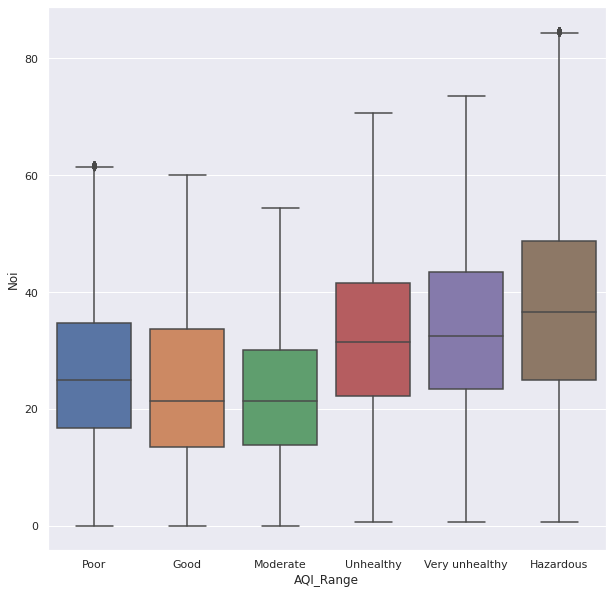

In [1080]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.Noi)
sns.set(rc={'figure.figsize':(10,10)})

In [1081]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Poor'].Noi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Poor')&(df_upsampled.Noi< lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Poor')&(df_upsampled.Noi> ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134797
Unhealthy         117382
Moderate          116299
Poor              115372
Very unhealthy    112380
Hazardous          97488
Name: AQI_Range, dtype: int64

In [1082]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Hazardous'].Noi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.Noi< lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.Noi> ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134797
Unhealthy         117382
Moderate          116299
Poor              115372
Very unhealthy    112380
Hazardous          97435
Name: AQI_Range, dtype: int64

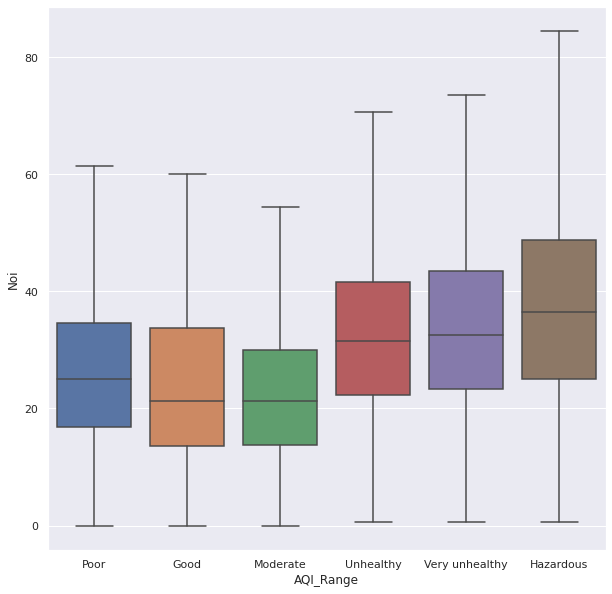

In [1083]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.Noi)
sns.set(rc={'figure.figsize':(10,10)})

#RSPMi

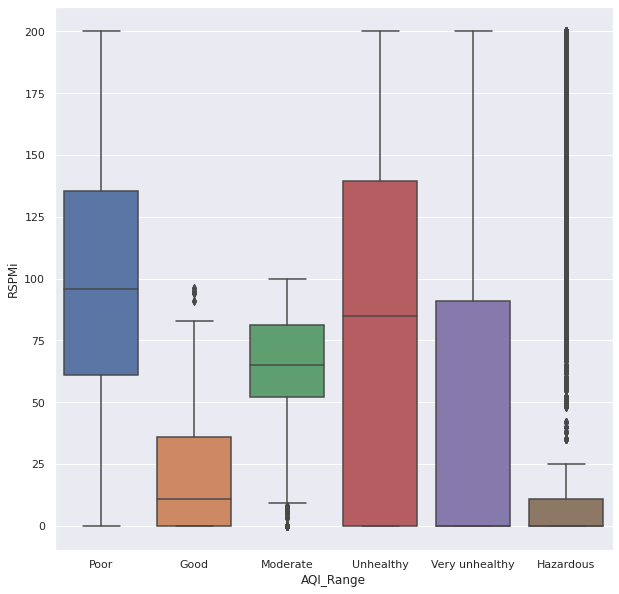

In [1084]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.RSPMi)
sns.set(rc={'figure.figsize':(10,10)})

In [1085]:
df_upsampled.AQI_Range.value_counts()

Good              134797
Unhealthy         117382
Moderate          116299
Poor              115372
Very unhealthy    112380
Hazardous          97435
Name: AQI_Range, dtype: int64

In [1086]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Good'].RSPMi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Good')&(df_upsampled.RSPMi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Good')&(df_upsampled.RSPMi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134785
Unhealthy         117382
Moderate          116299
Poor              115372
Very unhealthy    112380
Hazardous          97435
Name: AQI_Range, dtype: int64

In [1087]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Moderate'].RSPMi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Moderate')&(df_upsampled.RSPMi< lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Moderate')&(df_upsampled.RSPMi> ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134785
Unhealthy         117382
Poor              115372
Moderate          113535
Very unhealthy    112380
Hazardous          97435
Name: AQI_Range, dtype: int64

In [1088]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Hazardous'].RSPMi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.RSPMi< lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.RSPMi> ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134785
Unhealthy         117382
Poor              115372
Moderate          113535
Very unhealthy    112380
Hazardous          84316
Name: AQI_Range, dtype: int64

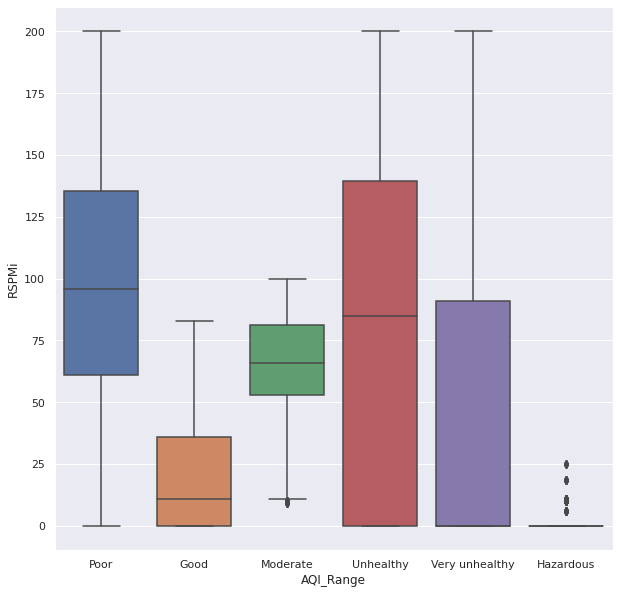

In [1089]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.RSPMi)
sns.set(rc={'figure.figsize':(10,10)})

In [1090]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Hazardous'].RSPMi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.RSPMi< lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.RSPMi> ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              134785
Unhealthy         117382
Poor              115372
Moderate          113535
Very unhealthy    112380
Hazardous          70051
Name: AQI_Range, dtype: int64

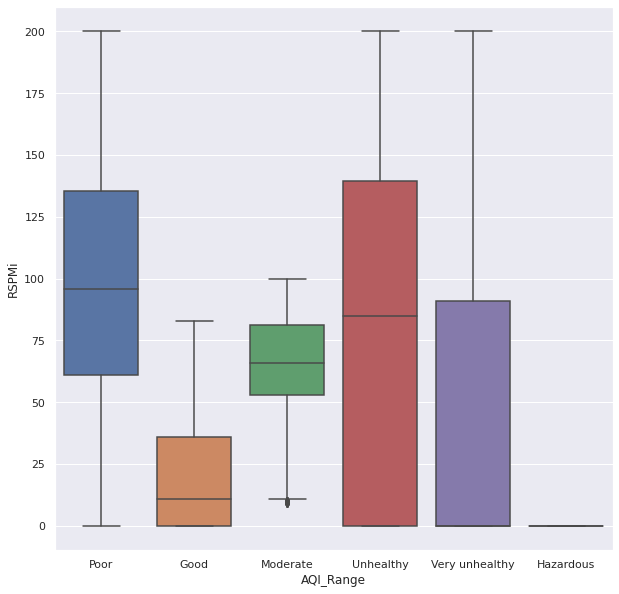

In [1091]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.RSPMi)
sns.set(rc={'figure.figsize':(10,10)})

#SPMi	

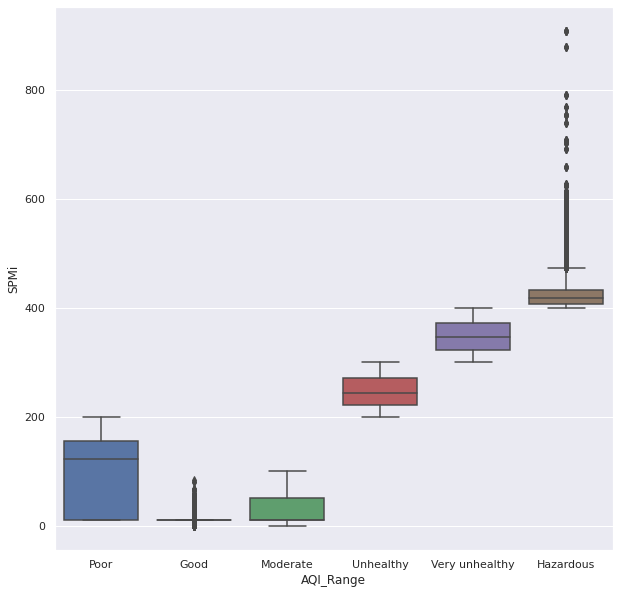

In [1092]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.SPMi)
sns.set(rc={'figure.figsize':(10,10)})

In [1093]:
df_upsampled.AQI_Range.value_counts()

Good              134785
Unhealthy         117382
Poor              115372
Moderate          113535
Very unhealthy    112380
Hazardous          70051
Name: AQI_Range, dtype: int64

In [1094]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Good'].SPMi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Good')&(df_upsampled.SPMi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Good')&(df_upsampled.SPMi > ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              122090
Unhealthy         117382
Poor              115372
Moderate          113535
Very unhealthy    112380
Hazardous          70051
Name: AQI_Range, dtype: int64

In [1095]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Hazardous'].SPMi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SPMi< lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SPMi> ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              122090
Unhealthy         117382
Poor              115372
Moderate          113535
Very unhealthy    112380
Hazardous          64386
Name: AQI_Range, dtype: int64

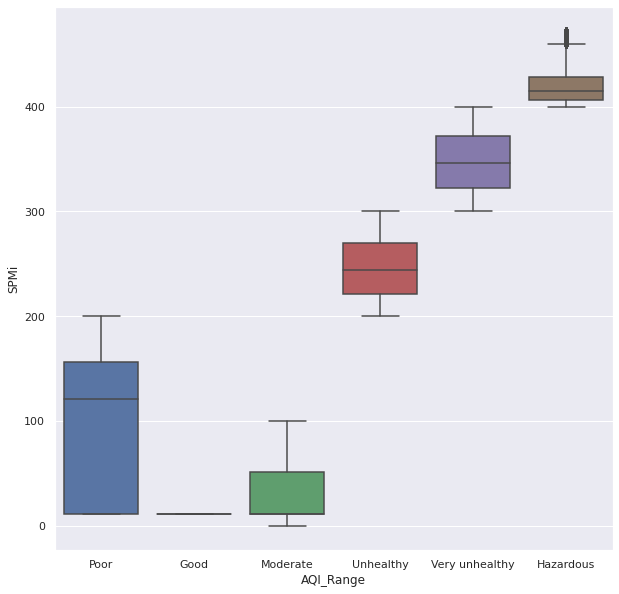

In [1096]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.SPMi)
sns.set(rc={'figure.figsize':(10,10)})

In [1097]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Hazardous'].SPMi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SPMi< lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SPMi< lr)],inplace=True)

df_upsampled.AQI_Range.value_counts()

Good              122090
Unhealthy         117382
Poor              115372
Moderate          113535
Very unhealthy    112380
Hazardous          64386
Name: AQI_Range, dtype: int64

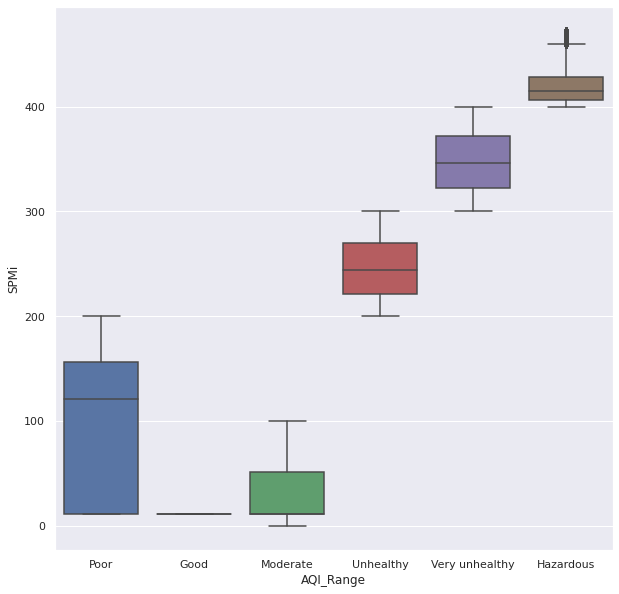

In [1098]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.SPMi)
sns.set(rc={'figure.figsize':(10,10)})

In [1099]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Hazardous'].SPMi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SPMi< lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SPMi> ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              122090
Unhealthy         117382
Poor              115372
Moderate          113535
Very unhealthy    112380
Hazardous          62188
Name: AQI_Range, dtype: int64

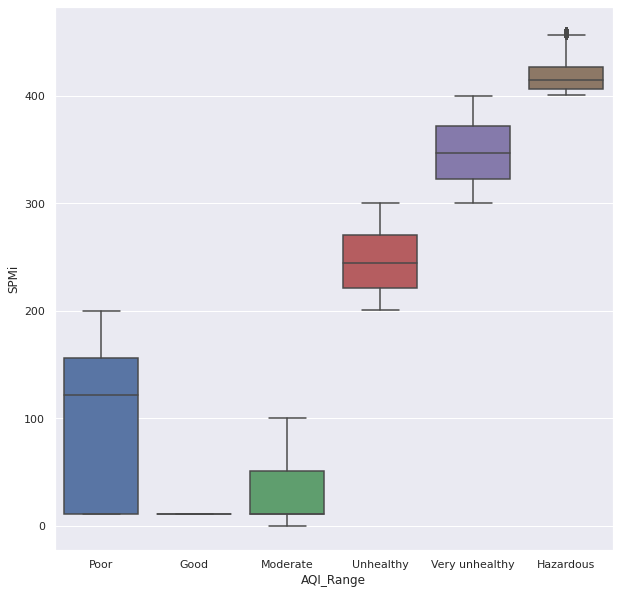

In [1100]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.SPMi)
sns.set(rc={'figure.figsize':(10,10)})

In [1101]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Hazardous'].SPMi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SPMi< lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SPMi> ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              122090
Unhealthy         117382
Poor              115372
Moderate          113535
Very unhealthy    112380
Hazardous          61441
Name: AQI_Range, dtype: int64

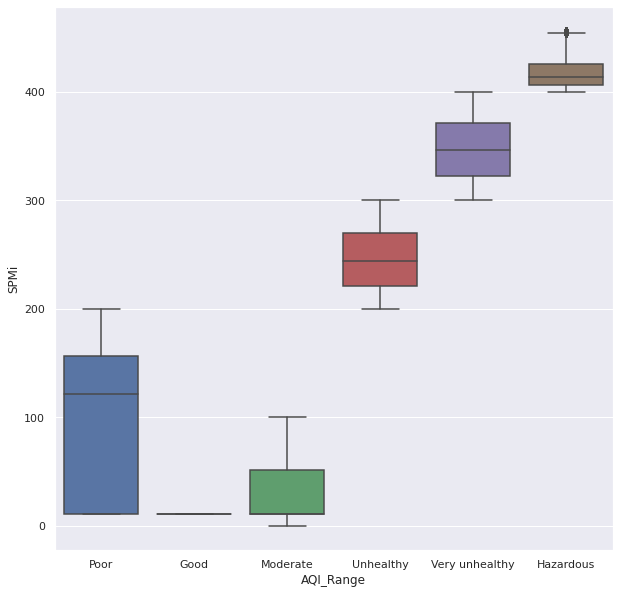

In [1102]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.SPMi)
sns.set(rc={'figure.figsize':(10,10)})

In [1103]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Hazardous'].SPMi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SPMi< lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SPMi> ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              122090
Unhealthy         117382
Poor              115372
Moderate          113535
Very unhealthy    112380
Hazardous          60867
Name: AQI_Range, dtype: int64

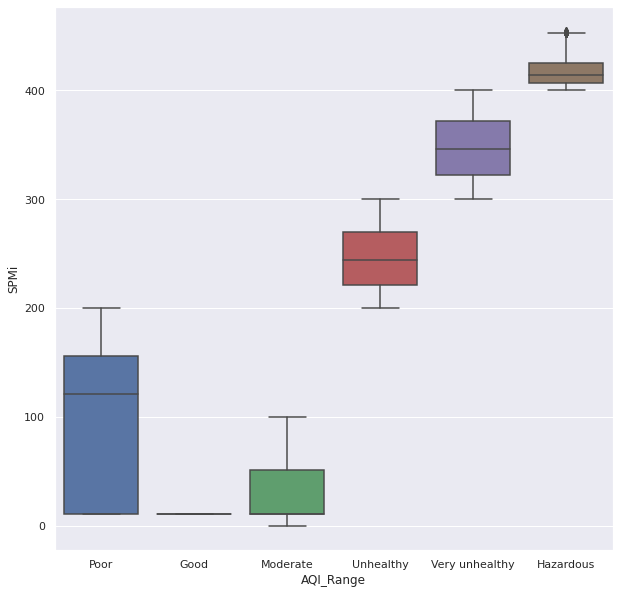

In [1104]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.SPMi)
sns.set(rc={'figure.figsize':(10,10)})

In [1105]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range== 'Hazardous'].SPMi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SPMi< lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Hazardous')&(df_upsampled.SPMi> ur)],inplace=True)
df_upsampled.AQI_Range.value_counts()

Good              122090
Unhealthy         117382
Poor              115372
Moderate          113535
Very unhealthy    112380
Hazardous          60614
Name: AQI_Range, dtype: int64

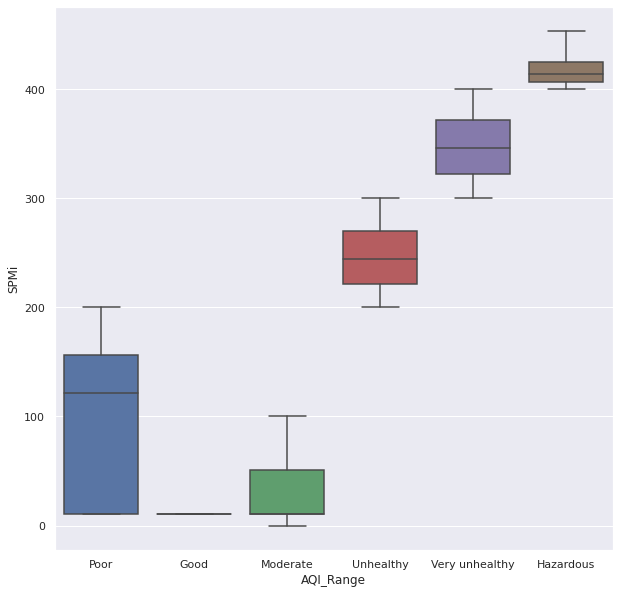

In [1106]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.SPMi)
sns.set(rc={'figure.figsize':(10,10)})

#PMi

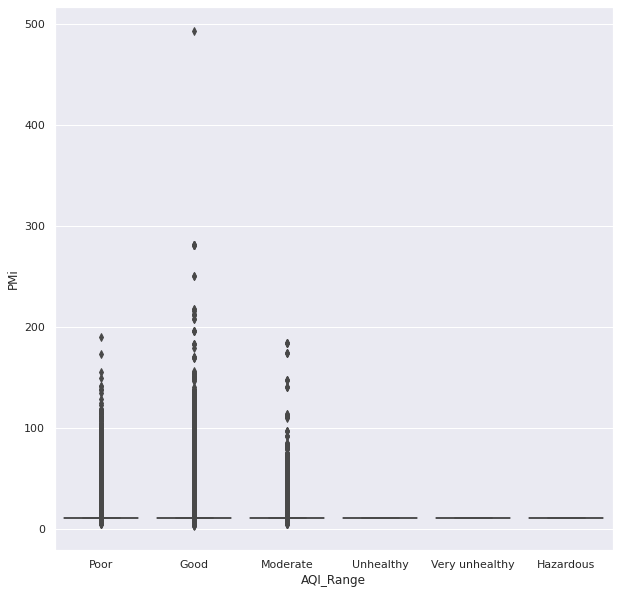

In [1107]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.PMi)
sns.set(rc={'figure.figsize':(10,10)})

In [1108]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range == 'Poor'].PMi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Poor')&(df_upsampled.PMi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Poor')&(df_upsampled.PMi > ur)],inplace=True)

df_upsampled.AQI_Range.value_counts()

Good              122090
Unhealthy         117382
Poor              113997
Moderate          113535
Very unhealthy    112380
Hazardous          60614
Name: AQI_Range, dtype: int64

In [1109]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range == 'Good'].PMi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Good')&(df_upsampled.PMi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Good')&(df_upsampled.PMi > ur)],inplace=True)

df_upsampled.AQI_Range.value_counts()

Good              119389
Unhealthy         117382
Poor              113997
Moderate          113535
Very unhealthy    112380
Hazardous          60614
Name: AQI_Range, dtype: int64

In [1110]:
lr,ur=Outlier(df_upsampled[df_upsampled.AQI_Range == 'Moderate'].PMi)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Moderate')&(df_upsampled.PMi < lr)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.AQI_Range == 'Moderate')&(df_upsampled.PMi > ur)],inplace=True)

df_upsampled.AQI_Range.value_counts()

Good              119389
Unhealthy         117382
Poor              113997
Very unhealthy    112380
Moderate          108184
Hazardous          60614
Name: AQI_Range, dtype: int64

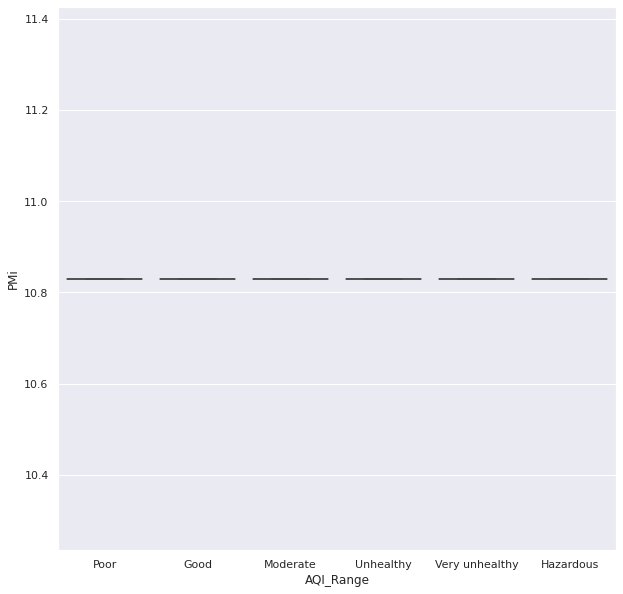

In [1111]:
sns.boxplot(x=df_upsampled.AQI_Range,y=df_upsampled.PMi)
sns.set(rc={'figure.figsize':(10,10)})

#DATA SPLITTING

In [1112]:
X= df_upsampled[['SOi','Noi','RSPMi','SPMi']]
Y = df_upsampled['AQI_Range']

In [1113]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

# Feature Scaling

In [1114]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

#Model Building & Evaluation

In [1115]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.preprocessing import LabelBinarizer



def evaluator(Y_test, Y_pred):    
    
    # Accuracy:
    print('Accuracy is: ', accuracy_score(Y_test,Y_pred))
    print('')
    # Classification Report:
    print('Classification Report: \n',classification_report(Y_test,Y_pred))

     # Area Under The Curve Score:

    lb = LabelBinarizer()
    Y_test1 = lb.fit_transform(Y_test)
    Y_pred1 =lb.transform(Y_pred)
    print('AUC_ROC Score: ',roc_auc_score(Y_test1,Y_pred1,average='macro'),'\n\n')


    print("Confusion Matrix: ")
    plt.figure(figsize=(10, 5))
    sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='g');
    plt.title('Confusion Matrix', fontsize=20)

    

#Using Random forest classifier

In [1116]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train,Y_train)

RandomForestClassifier()

Accuracy is:  0.9999920879816441

Classification Report: 
                 precision    recall  f1-score   support

          Good       1.00      1.00      1.00     23707
     Hazardous       1.00      1.00      1.00     12120
      Moderate       1.00      1.00      1.00     21694
          Poor       1.00      1.00      1.00     22831
     Unhealthy       1.00      1.00      1.00     23361
Very unhealthy       1.00      1.00      1.00     22677

      accuracy                           1.00    126390
     macro avg       1.00      1.00      1.00    126390
  weighted avg       1.00      1.00      1.00    126390

AUC_ROC Score:  0.99999568890855 


Confusion Matrix: 


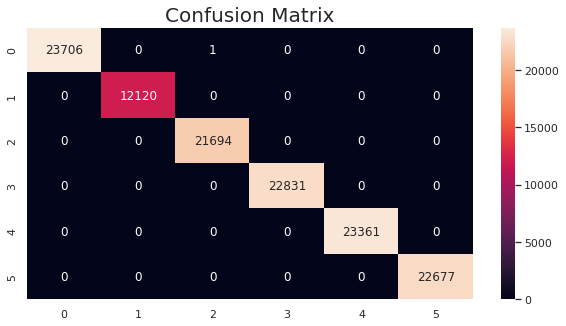

In [1117]:
pred_rf = rf_classifier.predict(X_test)

evaluator(Y_test, pred_rf)

#Using Decision Tree Classifier

In [1118]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()

#training
model2.fit(X_train,Y_train)


DecisionTreeClassifier()

Accuracy is:  0.9999920879816441

Classification Report: 
                 precision    recall  f1-score   support

          Good       1.00      1.00      1.00     23707
     Hazardous       1.00      1.00      1.00     12120
      Moderate       1.00      1.00      1.00     21694
          Poor       1.00      1.00      1.00     22831
     Unhealthy       1.00      1.00      1.00     23361
Very unhealthy       1.00      1.00      1.00     22677

      accuracy                           1.00    126390
     macro avg       1.00      1.00      1.00    126390
  weighted avg       1.00      1.00      1.00    126390

AUC_ROC Score:  0.99999568890855 


Confusion Matrix: 


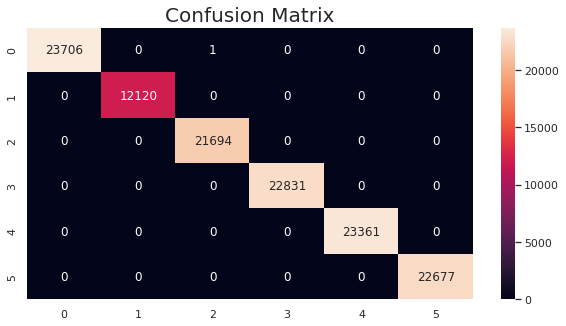

In [1119]:
#prediction
pred_dt = model2.predict(X_test)

evaluator(Y_test, pred_dt)

# Using Naive Bayes Classifier

In [1120]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()

#training
model3.fit(X_train, Y_train)



GaussianNB()

Accuracy is:  0.7909170029274468

Classification Report: 
                 precision    recall  f1-score   support

          Good       0.60      1.00      0.75     23707
     Hazardous       0.69      1.00      0.81     12120
      Moderate       0.84      0.18      0.29     21694
          Poor       0.89      0.91      0.90     22831
     Unhealthy       0.96      0.97      0.96     23361
Very unhealthy       0.96      0.75      0.84     22677

      accuracy                           0.79    126390
     macro avg       0.82      0.80      0.76    126390
  weighted avg       0.83      0.79      0.76    126390

AUC_ROC Score:  0.8790938130402597 


Confusion Matrix: 


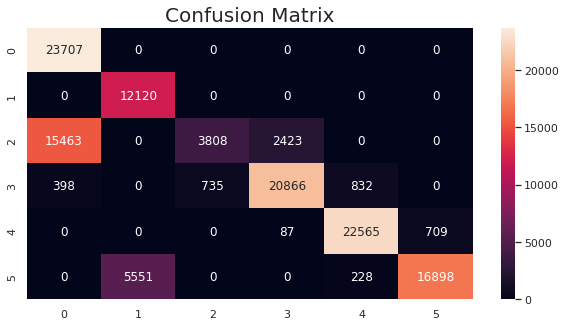

In [1121]:
#prediction
pred_NB = model3.predict(X_test)

evaluator(Y_test, pred_NB)

# Using K Nearest Neighbour

In [1122]:
from sklearn.neighbors import KNeighborsClassifier
model4=KNeighborsClassifier()

#training
model4.fit(X_train,Y_train)



KNeighborsClassifier()

Accuracy is:  0.9884009810902761

Classification Report: 
                 precision    recall  f1-score   support

          Good       1.00      1.00      1.00     23707
     Hazardous       1.00      1.00      1.00     12120
      Moderate       0.98      0.98      0.98     21694
          Poor       0.99      0.97      0.98     22831
     Unhealthy       0.98      0.99      0.98     23361
Very unhealthy       0.99      1.00      1.00     22677

      accuracy                           0.99    126390
     macro avg       0.99      0.99      0.99    126390
  weighted avg       0.99      0.99      0.99    126390

AUC_ROC Score:  0.9933515770135863 


Confusion Matrix: 


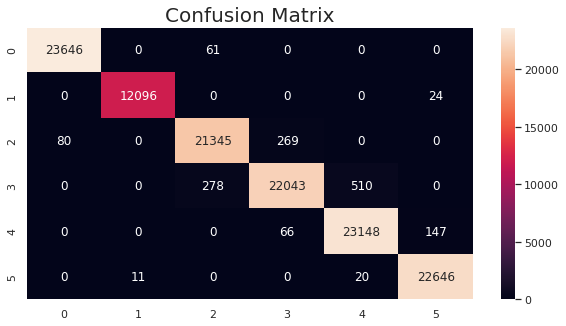

In [1123]:
#prediction
pred_KNN = model4.predict(X_test)

evaluator(Y_test, pred_KNN)

#MODEL COMPARISIONS

In [1124]:
model_accuracy = pd.DataFrame(columns=['Model','Accuracy'])
models = {
          'RFC' : RandomForestClassifier(),
          'DTC' : DecisionTreeClassifier(),
          'NBC': GaussianNB(),
          'KNN' : KNeighborsClassifier()
      
          
          
          }

for test, clf in models.items():
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    acc = accuracy_score(Y_test,Y_pred)
    train_pred = clf.predict(X_train)
    train_acc = accuracy_score(Y_train, train_pred)
    print( test + ' scores')
    print(acc)
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    print('*' * 100)
    model_accuracy = model_accuracy.append({'Model': test, 'Accuracy': acc, 'Train_acc': train_acc}, ignore_index=True)

RFC scores
0.9999920879816441
                precision    recall  f1-score   support

          Good       1.00      1.00      1.00     23707
     Hazardous       1.00      1.00      1.00     12120
      Moderate       1.00      1.00      1.00     21694
          Poor       1.00      1.00      1.00     22831
     Unhealthy       1.00      1.00      1.00     23361
Very unhealthy       1.00      1.00      1.00     22677

      accuracy                           1.00    126390
     macro avg       1.00      1.00      1.00    126390
  weighted avg       1.00      1.00      1.00    126390

[[23706     0     1     0     0     0]
 [    0 12120     0     0     0     0]
 [    0     0 21694     0     0     0]
 [    0     0     0 22831     0     0]
 [    0     0     0     0 23361     0]
 [    0     0     0     0     0 22677]]
****************************************************************************************************
DTC scores
0.9999920879816441
                precision    recall  f1-s

In [1125]:
model_accuracy.sort_values(ascending=False, by = 'Accuracy')

,Model,Accuracy,Train_acc
0,RFC,0.999992,1.000000
1,DTC,0.999992,1.000000
3,KNN,0.988401,0.993376
2,NBC,0.790917,0.792280


#CONCLUSION: 
##1.From the above analysis, we see that the majorly affected states in India by air pollution belong to the northern region.
##2. States like Delhi, Punjab, Uttar Pradesh, Haryana are heavily polluted and require immediate action.
##3. We also saw that even if a state had a high level of pollutants, there were some regions in the states that were not polluted.
##4.We also see from statistical analysis — scatter plots that the states with high rspm concentrations also have high spm concentrations.
##5.From the heatmap, we conclude that some states were heavily polluted in the early stages(1980 to 2000) but, later, were taken care of.
##6. After comparing the above models we can say that Random Forest Classifier & Decision Tree classifier were the best performing classifiers based on their accuracies.